<div style="display: flex; text-align:center; background-color: rgb(102,120,153);" >
<h1 style="margin: auto; padding: 30px; ">Analysez les ventes d'une librairie avec Python <br>
</h1>
</div>

Après un an de ventes en ligne, la société Rester Livres dispose de suffisamment de données pour dresser une typologie précise de ses clients et produits. Nous allons vérifier s'il existe un lien entre le sexe des clients et les catégories de produits achetés, l'âge et le montant total des achats, la fréquence d'achat ou encore la taille du panier moyen.

Hormis les librairies Pandas et Seaborn, nous utiliserons scikit-learn pour confirmer les corrélations à l'aide de tests statistiques.

<div style="display: flex; text-align:center; background-color: rgb(102,120,153);" >
<h1 style="margin: auto; padding: 30px; ">Partie 1 - Exploration / Nettoyage <br>
</h1>
</div>

# Scénario

Je suis consultant Data Analyst chez Lapage, une librairie généraliste réputée, qui fait de la vente en ligne depuis 2 ans. 

Je suis ratachée au service Marketing

Mes missions :
 
 - Analyse des indicateurs de vente
 - Analyse des comportements clients en ligne pour les comparer à la vente des librairies physiques.
 
 
 
 

 <div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">1 - Importation des librairies et fichiers</h2>
</div>

In [1]:
# Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats

# Importation des jeux de données
client = pd.read_csv("customers.csv")
produit = pd.read_csv("products.csv")
transa = pd.read_csv("transactions.csv")

# Affichage des nombres : séparateur des milliers, et réduction du nombre de décimales
pd.options.display.float_format = '{:,.2f}'.format

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">2 - Nettoyage </h2>
</div>

Méthodologie : 
- Premier visuel : head(), shape, dtypes...
- Validation des PK : nunique()...
- Recherche erreur de valeur : unique(), min(), max()...
- Recherche et modification des doublons : duplicated()...
- Recherche et modification des valeurs manquantes : isna(), fillna()...

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.1- Client </h3>
</div>

Ce dataframe reférence les id des client ainsi que leur sexe, et leur année de naissance

In [2]:
client

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [3]:
client.dtypes

client_id    object
sex          object
birth         int64
dtype: object

On vérifie que la table ne contient aucun doublon avant de pouvoir déterminer la clé primaire.

In [4]:
client.duplicated().sum()

0

In [5]:
# Vérification de l'unicité de la variable client_id
client['client_id'].duplicated().sum()

0

On remarque que client_id a aucun doublon ce qui prouve de l'unicité de cette variable pour etre clé primaire de cette table

In [6]:
# Verification de la présence de valeurs manquante dans les différentes colonne du df client
client.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [7]:
client.describe(include='all')

,client_id,sex,birth
count,8623,8623,"8,623.00"
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,"1,978.28"
std,NaN,NaN,16.92
min,NaN,NaN,"1,929.00"
25%,NaN,NaN,"1,966.00"
50%,NaN,NaN,"1,979.00"
75%,NaN,NaN,"1,992.00"


On voit qu'on a plus de femme que d'hommes, les plus jeunes sont nés en 2004, les plus âgés en 1929, moyenne d'âge 1978 soit 43 ans

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.2- Produit </h3>
</div>

In [8]:
produit

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [9]:
produit.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

De même que pour le df client, on vérifie que la table ne contient aucun doublon avant de pouvoir déterminer la clé primaire.

In [10]:
produit.duplicated().sum()

0

In [11]:
# Vérification de l'unicité de la variable client_id
produit['id_prod'].duplicated().sum()

0

On remarque que id_prod a aucun doublon ce qui prouve de l'unicité de cette variable pour etre clé primaire de ce df

In [12]:
# Verification de la présence de valeurs manquante dans les différentes colonne du df produit
produit.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [13]:
produit['categ'].unique()

array([0, 1, 2], dtype=int64)

In [14]:
produit.describe(include='all') # Indicateurs statistiques

,id_prod,price,categ
count,3287,"3,287.00","3,287.00"
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.86,0.37
std,NaN,29.85,0.62
min,NaN,-1.00,0.00
25%,NaN,6.99,0.00
50%,NaN,13.06,0.00
75%,NaN,22.99,1.00


In [15]:
# Trier les prix par ordre croissant pour voir qu'elle produit est négatif
produit.sort_values(by='price',ascending=True).head()

,id_prod,price,categ
731,T_0,-1.00,0
2355,0_202,0.62,0
2272,0_528,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0


Les prix des produits varie entre -1 et 300 €. Un prix négatif n'existe pas, on remarque que celui si est affilié a un produit nommé T_0 qui est surement un produit test, il faudra nettoyé cette valeur.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.3- Transaction </h3>
</div>

Ce dataframe reférence les id des produit vendu ainsi que leur date/heure de vente, le numero de session et les clients qui ont acheté ce produit

In [16]:
transa

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [17]:
transa.duplicated().sum()

126

In [18]:
transa.loc[transa.duplicated()]

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


On remarque que ces doublons sont des données test. Elle ne sont pas nécessaire et pourrais corrompre nos données, il faut donc les supprimés

In [19]:
# Suppression des doublons
transa.drop_duplicates(inplace=True)

In [20]:
transa.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.4- Jointure </h3>
</div>


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.4.1 - Merge Client / Transa </h3>
</div>

In [21]:
# Merge test gauche entre le merge précédent et le df produit_clean sur id_prod
df_test1 = pd.merge(client, transa,on='client_id',how='outer',indicator=True)
df_test1

,client_id,sex,birth,id_prod,date,session_id,_merge
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762,both
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707,both
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628,both
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,both
4,c_4410,f,1967,1_483,2022-03-13 21:35:55.949042,s_178686,both
...,...,...,...,...,...,...,...
679422,c_84,f,1982,0_1438,2022-05-29 06:11:50.316631,s_215697,both
679423,c_84,f,1982,0_1020,2021-10-21 03:52:13.863959,s_107849,both
679424,c_84,f,1982,0_1399,2021-10-01 16:13:18.997813,s_98493,both
679425,c_84,f,1982,0_1417,2021-03-13 23:55:06.835238,s_5960,both


In [22]:
df_test1['_merge'].describe()

count     679427
unique         2
top         both
freq      679406
Name: _merge, dtype: object

In [23]:
df_test1.loc[df_test1['_merge']=='right_only']

,client_id,sex,birth,id_prod,date,session_id,_merge


In [24]:
df_test1.loc[df_test1['_merge']=='left_only']

,client_id,sex,birth,id_prod,date,session_id,_merge
59493,c_8253,f,2001,NaN,NaN,NaN,left_only
200286,c_3789,f,1997,NaN,NaN,NaN,left_only
218173,c_4406,f,1998,NaN,NaN,NaN,left_only
220425,c_2706,f,1967,NaN,NaN,NaN,left_only
225575,c_3443,m,1959,NaN,NaN,NaN,left_only
248446,c_4447,m,1956,NaN,NaN,NaN,left_only
249002,c_3017,f,1992,NaN,NaN,NaN,left_only
261061,c_4086,f,1992,NaN,NaN,NaN,left_only
313170,c_6930,m,2004,NaN,NaN,NaN,left_only
319764,c_4358,m,1999,NaN,NaN,NaN,left_only


In [25]:
len(df_test1.loc[df_test1['_merge']=='left_only'])

21

On distingue ici 21 clients qui n'ont pas réalisé d'achat, pour notre analyse ceux la ne va pas nous servir. Il est donc préférable d'utilisé un merge Right pour cette jointure.

In [26]:
# Merge test gauche entre le merge précédent et le df produit_clean sur id_prod
client_transa = pd.merge(client, transa,on='client_id',how='right')
client_transa

,client_id,sex,birth,id_prod,date,session_id
0,c_103,f,1986,0_1518,2022-05-20 13:21:29.043970,s_211425
1,c_8534,m,1988,1_251,2022-02-02 07:55:19.149409,s_158752
2,c_6714,f,1968,0_1277,2022-06-18 15:44:33.155329,s_225667
3,c_6941,m,2000,2_209,2021-06-24 04:19:29.835891,s_52962
4,c_4232,m,1980,0_1509,2023-01-11 08:22:08.194479,s_325227
...,...,...,...,...,...,...
679401,c_8489,f,1951,0_1551,2022-01-15 13:05:06.246925,s_150195
679402,c_4370,f,1977,1_639,2022-03-19 16:03:23.429229,s_181434
679403,c_304,f,1988,0_1425,2022-12-20 04:33:37.584749,s_314704
679404,c_2227,m,1986,0_1994,2021-07-16 20:36:35.350579,s_63204


In [27]:
client_transa.duplicated().sum()

0

In [28]:
client_transa.isna().sum()

client_id     0
sex           0
birth         0
id_prod       0
date          0
session_id    0
dtype: int64

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.4.2 - Merge ClientTransa / Produit </h3>
</div>

In [29]:
# Merge test gauche entre le merge précédent et le df produit_clean sur id_prod
df_test2 = pd.merge(client_transa, produit,on='id_prod',how='left',indicator=True)
df_test2

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
0,c_103,f,1986,0_1518,2022-05-20 13:21:29.043970,s_211425,4.18,0.00,both
1,c_8534,m,1988,1_251,2022-02-02 07:55:19.149409,s_158752,15.99,1.00,both
2,c_6714,f,1968,0_1277,2022-06-18 15:44:33.155329,s_225667,7.99,0.00,both
3,c_6941,m,2000,2_209,2021-06-24 04:19:29.835891,s_52962,69.99,2.00,both
4,c_4232,m,1980,0_1509,2023-01-11 08:22:08.194479,s_325227,4.99,0.00,both
...,...,...,...,...,...,...,...,...,...
679401,c_8489,f,1951,0_1551,2022-01-15 13:05:06.246925,s_150195,12.99,0.00,both
679402,c_4370,f,1977,1_639,2022-03-19 16:03:23.429229,s_181434,10.99,1.00,both
679403,c_304,f,1988,0_1425,2022-12-20 04:33:37.584749,s_314704,12.99,0.00,both
679404,c_2227,m,1986,0_1994,2021-07-16 20:36:35.350579,s_63204,4.98,0.00,both


In [30]:
# Visualisation des données qui sont dans le df client_transa mais pas dans le df produit_clean
df_test2_left_only = df_test2.loc[df_test2['_merge']=='left_only']
df_test2_left_only

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
2633,c_4746,m,1940,0_2245,2022-09-23 07:22:38.636773,s_272266,NaN,NaN,left_only
10106,c_6713,f,1963,0_2245,2022-07-23 09:24:14.133889,s_242482,NaN,NaN,left_only
11727,c_5108,m,1978,0_2245,2022-12-03 03:26:35.696673,s_306338,NaN,NaN,left_only
15675,c_1391,m,1991,0_2245,2021-08-16 11:33:25.481411,s_76493,NaN,NaN,left_only
16377,c_7954,m,1973,0_2245,2022-07-16 05:53:01.627491,s_239078,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
669606,c_131,m,1981,0_2245,2021-08-25 09:06:03.504061,s_80395,NaN,NaN,left_only
670558,c_4167,f,1979,0_2245,2022-03-06 19:59:19.462288,s_175311,NaN,NaN,left_only
671162,c_4453,m,1981,0_2245,2022-05-16 11:35:20.319501,s_209381,NaN,NaN,left_only
675554,c_1098,m,1986,0_2245,2022-02-11 09:05:43.952857,s_163405,NaN,NaN,left_only


In [31]:
df_test2_left_only.isna().sum()

client_id       0
sex             0
birth           0
id_prod         0
date            0
session_id      0
price         221
categ         221
_merge          0
dtype: int64

In [32]:
# Présence d'un unique id_prod
df_test2_left_only['id_prod'].unique()

array(['0_2245'], dtype=object)

In [33]:
# Recherche de l'id prod 0_2245 dans le df produit
produit.loc[produit['id_prod']=='0_2245']

,id_prod,price,categ


On remarque qu'il y a aucune présence dans le df produit de l'id_prod 0_2245

In [34]:
transa.loc[transa['id_prod']=='0_2245']

,id_prod,date,session_id,client_id
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746
10106,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713
11727,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108
15675,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391
16377,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954
...,...,...,...,...
669730,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131
670682,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167
671286,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453
675679,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098


Alors qu'ici on remarque qu'il y a eu des transactions réalisé avec ce produit.

Maintenant, on veux rajouté ce produit mais on ne connais ni son prix, ni sa catég. On va donc chercher a les decouvrir.

Afin de déterminé la catégorie du produit, j'ai remarqué que chaque produit avais un chiffre précédé d'un '_' et d'autre chiffres. Ce premier chiffre fait référence a la catégorie du produit c'est a dire que notre produit 0_2245 fait parti de la catégorie 0.

Enfin, pour son prix, il est difficile de deviné son prix. Nous allons donc imputé son prix par la moyenne des prix de la categ 0 

In [35]:
# Imputation par la moyenne des prix de la catégorie 0
categ_0 = produit.loc[produit['categ']==0] 
moyenne_prix_cat0 = round(categ_0['price'].mean(),2)
moyenne_prix_cat0

11.73

In [36]:
# Ajout de l'id prod 0_2245 au dataframe produit_clean
produit_clean = produit.append(pd.DataFrame([['0_2245',11.73,0]],columns=['id_prod','price','categ'])) 
produit_clean.loc[produit_clean['id_prod']=='0_2245']

,id_prod,price,categ
0,0_2245,11.73,0


In [37]:
# MERGE gauche entre le df client_transa et produit_clean sur l'id prod
df = pd.merge(client_transa, produit_clean,on='id_prod',how='left')
df

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_103,f,1986,0_1518,2022-05-20 13:21:29.043970,s_211425,4.18,0
1,c_8534,m,1988,1_251,2022-02-02 07:55:19.149409,s_158752,15.99,1
2,c_6714,f,1968,0_1277,2022-06-18 15:44:33.155329,s_225667,7.99,0
3,c_6941,m,2000,2_209,2021-06-24 04:19:29.835891,s_52962,69.99,2
4,c_4232,m,1980,0_1509,2023-01-11 08:22:08.194479,s_325227,4.99,0
...,...,...,...,...,...,...,...,...
679401,c_8489,f,1951,0_1551,2022-01-15 13:05:06.246925,s_150195,12.99,0
679402,c_4370,f,1977,1_639,2022-03-19 16:03:23.429229,s_181434,10.99,1
679403,c_304,f,1988,0_1425,2022-12-20 04:33:37.584749,s_314704,12.99,0
679404,c_2227,m,1986,0_1994,2021-07-16 20:36:35.350579,s_63204,4.98,0


In [38]:
df.dtypes

client_id      object
sex            object
birth           int64
id_prod        object
date           object
session_id     object
price         float64
categ           int64
dtype: object

Ici on remarque que la colonne date n'est pas en datetime.

On se souvient que précédemment on avais déclarer la présence de donnée test découvert a l'aide du nom de produit T_0

In [39]:
donnee_test = df.loc[df['id_prod']=='T_0']
donnee_test

,client_id,sex,birth,id_prod,date,session_id,price,categ
3019,ct_0,f,2001,T_0,test_2021-03-01 02:30:02.237419,s_0,-1.00,0
5138,ct_0,f,2001,T_0,test_2021-03-01 02:30:02.237425,s_0,-1.00,0
9668,ct_1,m,2001,T_0,test_2021-03-01 02:30:02.237437,s_0,-1.00,0
10728,ct_0,f,2001,T_0,test_2021-03-01 02:30:02.237436,s_0,-1.00,0
15292,ct_0,f,2001,T_0,test_2021-03-01 02:30:02.237430,s_0,-1.00,0
...,...,...,...,...,...,...,...,...
577222,ct_0,f,2001,T_0,test_2021-03-01 02:30:02.237424,s_0,-1.00,0
592959,ct_1,m,2001,T_0,test_2021-03-01 02:30:02.237422,s_0,-1.00,0
607783,ct_0,f,2001,T_0,test_2021-03-01 02:30:02.237412,s_0,-1.00,0
625936,ct_0,f,2001,T_0,test_2021-03-01 02:30:02.237422,s_0,-1.00,0


Nous allons donc supprimé ces donnée test de notre dataframes car elle vont faussé nos analyse :

In [40]:
# Suppression des données test
df = df.drop(donnee_test.index).reset_index()
df

,index,client_id,sex,birth,id_prod,date,session_id,price,categ
0,0,c_103,f,1986,0_1518,2022-05-20 13:21:29.043970,s_211425,4.18,0
1,1,c_8534,m,1988,1_251,2022-02-02 07:55:19.149409,s_158752,15.99,1
2,2,c_6714,f,1968,0_1277,2022-06-18 15:44:33.155329,s_225667,7.99,0
3,3,c_6941,m,2000,2_209,2021-06-24 04:19:29.835891,s_52962,69.99,2
4,4,c_4232,m,1980,0_1509,2023-01-11 08:22:08.194479,s_325227,4.99,0
...,...,...,...,...,...,...,...,...,...
679327,679401,c_8489,f,1951,0_1551,2022-01-15 13:05:06.246925,s_150195,12.99,0
679328,679402,c_4370,f,1977,1_639,2022-03-19 16:03:23.429229,s_181434,10.99,1
679329,679403,c_304,f,1988,0_1425,2022-12-20 04:33:37.584749,s_314704,12.99,0
679330,679404,c_2227,m,1986,0_1994,2021-07-16 20:36:35.350579,s_63204,4.98,0


Nous allons maintenant pouvoir modifier le type de donnée de notre colonne date

In [41]:
# Conversion de 'date' en datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d') 

In [42]:
df.dtypes

index                  int64
client_id             object
sex                   object
birth                  int64
id_prod               object
date          datetime64[ns]
session_id            object
price                float64
categ                  int64
dtype: object

In [43]:
 # Dates de transaction la plus ancienne et la plus récente
print("Les transactions s'étalent entre le ", str(df['date'].min())[:10], 'et', str(df['date'].max())[:10],", c'est-à-dire 2 ans.")

Les transactions s'étalent entre le  2021-03-01 et 2023-02-28 , c'est-à-dire 2 ans.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.5- Amélioration df </h3>
</div>

Pour améliorer nos données et afin d'enrichir nos futur analyse nous allons ajouté de nouvelle variables comme : panier moyen, tranche d'age etc..

In [44]:
# Création d'une colonne age, annee,mois,jour
df['age'] = datetime.now().year - df['birth']
df['annee'] = df['date'].dt.year 
df['mois'] = df['date'].dt.month 
df['jours'] = df['date'].dt.day
df['date_fixe'] = df['date'].dt.date # Variable temporaire de date fixe (jour)
df = df.reindex(columns=['client_id','id_prod','sex','birth','age','date','annee','mois','jours','date_fixe','session_id','price','categ'])
df

,client_id,id_prod,sex,birth,age,date,annee,mois,jours,date_fixe,session_id,price,categ
0,c_103,0_1518,f,1986,36,2022-05-20 13:21:29.043970,2022,5,20,2022-05-20,s_211425,4.18,0
1,c_8534,1_251,m,1988,34,2022-02-02 07:55:19.149409,2022,2,2,2022-02-02,s_158752,15.99,1
2,c_6714,0_1277,f,1968,54,2022-06-18 15:44:33.155329,2022,6,18,2022-06-18,s_225667,7.99,0
3,c_6941,2_209,m,2000,22,2021-06-24 04:19:29.835891,2021,6,24,2021-06-24,s_52962,69.99,2
4,c_4232,0_1509,m,1980,42,2023-01-11 08:22:08.194479,2023,1,11,2023-01-11,s_325227,4.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,c_8489,0_1551,f,1951,71,2022-01-15 13:05:06.246925,2022,1,15,2022-01-15,s_150195,12.99,0
679328,c_4370,1_639,f,1977,45,2022-03-19 16:03:23.429229,2022,3,19,2022-03-19,s_181434,10.99,1
679329,c_304,0_1425,f,1988,34,2022-12-20 04:33:37.584749,2022,12,20,2022-12-20,s_314704,12.99,0
679330,c_2227,0_1994,m,1986,36,2021-07-16 20:36:35.350579,2021,7,16,2021-07-16,s_63204,4.98,0


In [45]:
print(df['age'].min())
print(df['age'].max())

18
93


In [46]:
bin_labels=labels=['18-30', '31-40', '41-50','51-60','61-93']
df['tranch_age'] = pd.cut(x=df['age'], bins=[17,30,40,50,60,93],labels=bin_labels)

In [47]:
# Nombre total de vente par client
vente_total = df.groupby('client_id').count()['date'].reset_index().rename(columns={'date': 'total_ventes'})
vente_total

,client_id,total_ventes
0,c_1,39
1,c_10,58
2,c_100,8
3,c_1000,125
4,c_1001,102
...,...,...
8595,c_995,14
8596,c_996,95
8597,c_997,59
8598,c_998,53


In [48]:
# Ajout de la colonne total ventes dans notre df
df = pd.merge(df,vente_total,how='left', on='client_id')
df.sample()

,client_id,id_prod,sex,birth,age,date,annee,mois,jours,date_fixe,session_id,price,categ,tranch_age,total_ventes
28094,c_24,1_451,f,1972,50,2022-04-27 14:22:43.420897,2022,4,27,2022-04-27,s_200204,20.99,1,41-50,166


In [49]:
# Nombre de ventes moyen mensuelle
df['ventes_mensuelles'] = round(df['total_ventes'] / 23)
df.sample()

,client_id,id_prod,sex,birth,age,date,annee,mois,jours,date_fixe,session_id,price,categ,tranch_age,total_ventes,ventes_mensuelles
46916,c_5194,0_1534,m,1994,28,2022-11-21 05:48:40.895247,2022,11,21,2022-11-21,s_300572,4.62,0,18-30,73,3.00


In [50]:
# Panier moyen
panier_moyen = df.groupby(['client_id','date_fixe']).mean()['price'].reset_index()
panier_moyen = panier_moyen.groupby('client_id').mean()['price'].reset_index().rename(columns={'price':'panier_moyen'})
panier_moyen

,client_id,panier_moyen
0,c_1,13.33
1,c_10,23.12
2,c_100,28.40
3,c_1000,17.53
4,c_1001,15.74
...,...,...
8595,c_995,14.41
8596,c_996,16.50
8597,c_997,30.85
8598,c_998,65.05


In [51]:
# Ajout de la colonne panier moyen dans notre df
df = pd.merge(df, panier_moyen, how='left', on='client_id')
df.sample()

,client_id,id_prod,sex,birth,age,date,annee,mois,jours,date_fixe,session_id,price,categ,tranch_age,total_ventes,ventes_mensuelles,panier_moyen
156585,c_6714,0_1388,f,1968,54,2022-01-11 20:41:48.908839,2022,1,11,2022-01-11,s_148394,17.15,0,51-60,9187,399.00,16.68


In [52]:
# Taille du panier 
df.pivot_table(
        index=['client_id', 'date_fixe'], 
        values='price', 
        aggfunc='count').reset_index().pivot_table(
        index='client_id').reset_index().rename(
        columns={'price': 'taille_panier_moyen'})

,client_id,taille_panier_moyen
0,c_1,1.18
1,c_10,1.71
2,c_100,1.60
3,c_1000,1.45
4,c_1001,2.32
...,...,...
8595,c_995,1.56
8596,c_996,1.25
8597,c_997,2.46
8598,c_998,2.30


In [53]:
# Taille moyenne panier 
taille_du_panier = df.groupby(['client_id','date_fixe']).count()['price'].reset_index()
taille_moyenne_panier = taille_du_panier.groupby('client_id').mean().reset_index()
taille_moyenne_panier.rename(columns={'price':'taille moyenne du panier'},inplace=True)
taille_moyenne_panier

,client_id,taille moyenne du panier
0,c_1,1.18
1,c_10,1.71
2,c_100,1.60
3,c_1000,1.45
4,c_1001,2.32
...,...,...
8595,c_995,1.56
8596,c_996,1.25
8597,c_997,2.46
8598,c_998,2.30


In [54]:
# Ajout de la colonne taille moyenne du panier dans notre df
df = pd.merge(df, taille_moyenne_panier, on='client_id', how='left')
df

,client_id,id_prod,sex,birth,age,date,annee,mois,jours,date_fixe,session_id,price,categ,tranch_age,total_ventes,ventes_mensuelles,panier_moyen,taille moyenne du panier
0,c_103,0_1518,f,1986,36,2022-05-20 13:21:29.043970,2022,5,20,2022-05-20,s_211425,4.18,0,31-40,195,8.00,11.97,2.50
1,c_8534,1_251,m,1988,34,2022-02-02 07:55:19.149409,2022,2,2,2022-02-02,s_158752,15.99,1,31-40,247,11.00,13.50,2.33
2,c_6714,0_1277,f,1968,54,2022-06-18 15:44:33.155329,2022,6,18,2022-06-18,s_225667,7.99,0,51-60,9187,399.00,16.68,13.03
3,c_6941,2_209,m,2000,22,2021-06-24 04:19:29.835891,2021,6,24,2021-06-24,s_52962,69.99,2,18-30,17,1.00,48.08,1.31
4,c_4232,0_1509,m,1980,42,2023-01-11 08:22:08.194479,2023,1,11,2023-01-11,s_325227,4.99,0,41-50,168,7.00,13.58,2.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,c_8489,0_1551,f,1951,71,2022-01-15 13:05:06.246925,2022,1,15,2022-01-15,s_150195,12.99,0,61-93,73,3.00,15.02,1.38
679328,c_4370,1_639,f,1977,45,2022-03-19 16:03:23.429229,2022,3,19,2022-03-19,s_181434,10.99,1,41-50,84,4.00,13.10,3.82
679329,c_304,0_1425,f,1988,34,2022-12-20 04:33:37.584749,2022,12,20,2022-12-20,s_314704,12.99,0,31-40,117,5.00,14.91,2.39
679330,c_2227,0_1994,m,1986,36,2021-07-16 20:36:35.350579,2021,7,16,2021-07-16,s_63204,4.98,0,31-40,234,10.00,13.24,2.63


In [55]:
df.sample()

,client_id,id_prod,sex,birth,age,date,annee,mois,jours,date_fixe,session_id,price,categ,tranch_age,total_ventes,ventes_mensuelles,panier_moyen,taille moyenne du panier
47594,c_3681,0_2000,m,1984,38,2023-02-26 23:55:54.429296,2023,2,26,2023-02-26,s_347425,4.84,0,31-40,225,10.00,13.98,2.62


In [56]:
CA_par_client = df[['price','client_id']].groupby(['client_id']).sum('price').sort_values(by='price',ascending=False).reset_index()
CA_par_client.rename(columns={'price':'CA total'},inplace=True)
CA_par_client.head(10)

,client_id,CA total
0,c_1609,"324,033.35"
1,c_4958,"289,760.34"
2,c_6714,"153,669.30"
3,c_3454,"113,673.12"
4,c_3263,"5,276.87"
5,c_1570,"5,271.62"
6,c_2899,"5,214.05"
7,c_2140,"5,208.82"
8,c_7319,"5,155.77"
9,c_8026,"5,094.31"


In [57]:
# Ajout de la colonne CA total par client dans notre df
df = pd.merge(df, CA_par_client, on='client_id', how='left')
df

,client_id,id_prod,sex,birth,age,date,annee,mois,jours,date_fixe,session_id,price,categ,tranch_age,total_ventes,ventes_mensuelles,panier_moyen,taille moyenne du panier,CA total
0,c_103,0_1518,f,1986,36,2022-05-20 13:21:29.043970,2022,5,20,2022-05-20,s_211425,4.18,0,31-40,195,8.00,11.97,2.50,"2,288.49"
1,c_8534,1_251,m,1988,34,2022-02-02 07:55:19.149409,2022,2,2,2022-02-02,s_158752,15.99,1,31-40,247,11.00,13.50,2.33,"3,498.14"
2,c_6714,0_1277,f,1968,54,2022-06-18 15:44:33.155329,2022,6,18,2022-06-18,s_225667,7.99,0,51-60,9187,399.00,16.68,13.03,"153,669.30"
3,c_6941,2_209,m,2000,22,2021-06-24 04:19:29.835891,2021,6,24,2021-06-24,s_52962,69.99,2,18-30,17,1.00,48.08,1.31,886.50
4,c_4232,0_1509,m,1980,42,2023-01-11 08:22:08.194479,2023,1,11,2023-01-11,s_325227,4.99,0,41-50,168,7.00,13.58,2.21,"2,381.56"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,c_8489,0_1551,f,1951,71,2022-01-15 13:05:06.246925,2022,1,15,2022-01-15,s_150195,12.99,0,61-93,73,3.00,15.02,1.38,"1,088.84"
679328,c_4370,1_639,f,1977,45,2022-03-19 16:03:23.429229,2022,3,19,2022-03-19,s_181434,10.99,1,41-50,84,4.00,13.10,3.82,"1,186.77"
679329,c_304,0_1425,f,1988,34,2022-12-20 04:33:37.584749,2022,12,20,2022-12-20,s_314704,12.99,0,31-40,117,5.00,14.91,2.39,"1,692.89"
679330,c_2227,0_1994,m,1986,36,2021-07-16 20:36:35.350579,2021,7,16,2021-07-16,s_63204,4.98,0,31-40,234,10.00,13.24,2.63,"3,056.29"


<div style="display: flex; text-align:center; background-color: rgb(102,120,153);" >
<h1 style="margin: auto; padding: 30px; ">Partie 2 -  Analyse <br>
</h1>
</div>


 <div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">1 - Analyse pour Antoine </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">1.1- Indicateur et graphique autour du chiffre d'affaires : </h3>
</div>

In [58]:
# Chiffre d'affaire total
CA_total = df['price'].sum()
print("Le chiffre d'affaire total effectué durant la période d'étude est de " , str(CA_total), '€')

Le chiffre d'affaire total effectué durant la période d'étude est de  11856321.01 €


In [59]:
# Chiffre d'affaire par catég
CA_par_categ = df[['price','categ']].groupby(['categ']).sum()
print("Le chiffre d'affaire total par catégorie est de : ")
CA_par_categ

Le chiffre d'affaire total par catégorie est de : 


,price
categ,
0,"4,422,323.30"
1,"4,653,722.69"
2,"2,780,275.02"


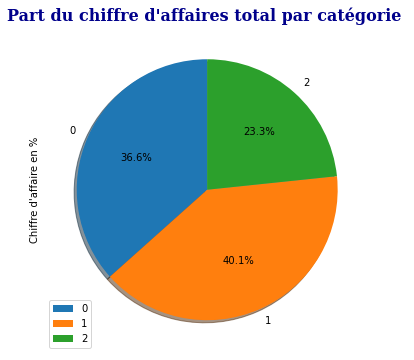

In [139]:
df[['categ','price']].groupby(['categ']).sum().rename(columns={"price" :"Chiffre d'affaire en %"}).plot(kind='pie', subplots=True, shadow = True,startangle=90,
                                                          figsize=(10,6),
                                                          autopct='%1.1f%%',)
plt.title("Part du chiffre d'affaires total par catégorie " , fontsize=16,
         fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30})

plt.show()

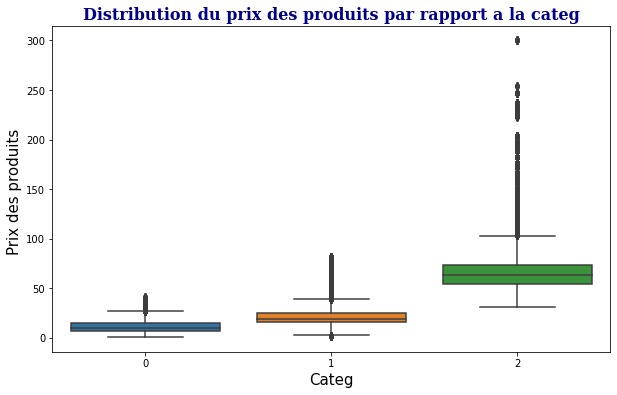

In [142]:
plt.figure(figsize=(10,6)),
sns.boxplot(x = df["categ"], y = df["price"]),
plt.title('Distribution du prix des produits par rapport a la categ' , fontsize=16,
         fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30}), 
plt.xlabel('Categ', fontsize=15) ,
plt.ylabel("Prix des produits ", fontsize=15),
plt.show()

On peut voir que la catégorie qui rapporte le plus en chiffre d'affaire est la catég 1 suivi de tres près de la catég 0 et celle qui rapporte le moins est la catég 2.

Ceci peut etre dûe au faite que les prix des produits de la catég 2 sont généralement 2 voir 3x superieur au deux autres catégories ce qui pourrais décourager les clients a vouloir acheté des livres qui sont assez cher

#### Nous allons maintenant étudié l'évolution du chiffre d'affaire au cours du temps.

Pour cela nous allons utiliser une serie temporelle

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">1.2- Serie temporelles :  </h3>
</div>

#### Une série temporelle, ou série chronologique, est une suite de valeurs numériques représentant l'évolution d'une variable au cours du temps.

Pour cela nous allons devoir indexer la colonne date

In [62]:
# Creation d'une copie du df_final avec comme index la colonne date
dt = df.set_index('date')

In [63]:
# Visualisation
dt.head(10)

,client_id,id_prod,sex,birth,age,annee,mois,jours,date_fixe,session_id,price,categ,tranch_age,total_ventes,ventes_mensuelles,panier_moyen,taille moyenne du panier,CA total
date,,,,,,,,,,,,,,,,,,
2022-05-20 13:21:29.043970,c_103,0_1518,f,1986,36,2022,5,20,2022-05-20,s_211425,4.18,0,31-40,195,8.00,11.97,2.50,"2,288.49"
2022-02-02 07:55:19.149409,c_8534,1_251,m,1988,34,2022,2,2,2022-02-02,s_158752,15.99,1,31-40,247,11.00,13.50,2.33,"3,498.14"
2022-06-18 15:44:33.155329,c_6714,0_1277,f,1968,54,2022,6,18,2022-06-18,s_225667,7.99,0,51-60,9187,399.00,16.68,13.03,"153,669.30"
2021-06-24 04:19:29.835891,c_6941,2_209,m,2000,22,2021,6,24,2021-06-24,s_52962,69.99,2,18-30,17,1.00,48.08,1.31,886.50
2023-01-11 08:22:08.194479,c_4232,0_1509,m,1980,42,2023,1,11,2023-01-11,s_325227,4.99,0,41-50,168,7.00,13.58,2.21,"2,381.56"
2022-10-20 15:59:16.084030,c_1478,0_1418,f,1972,50,2022,10,20,2022-10-20,s_285425,8.57,0,41-50,293,13.00,13.13,2.57,"3,942.19"
2022-06-03 04:45:09.871601,c_7782,0_1475,m,1981,41,2022,6,3,2022-06-03,s_218033,11.99,0,41-50,200,9.00,13.45,2.47,"2,644.09"
2021-06-26 14:48:55.311418,c_7456,0_2110,f,1985,37,2021,6,26,2021-06-26,s_54122,7.04,0,31-40,187,8.00,12.59,2.01,"2,241.35"
2022-12-27 12:27:40.641366,c_7363,0_1156,f,1982,40,2022,12,27,2022-12-27,s_318058,12.79,0,31-40,44,2.00,15.42,1.69,674.40


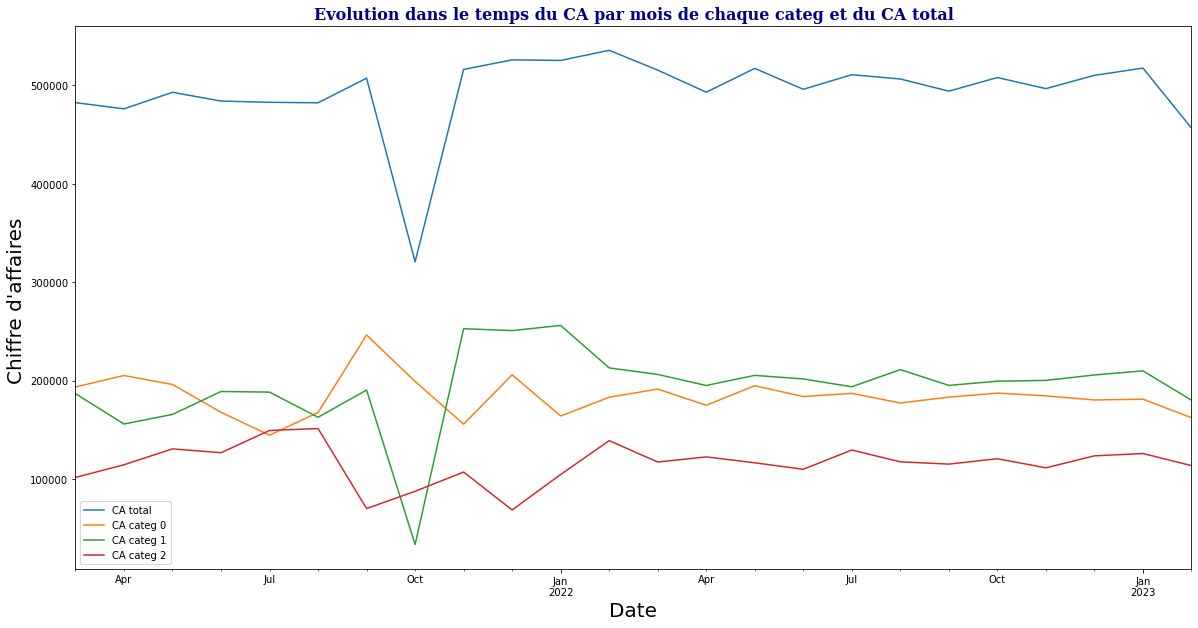

In [64]:
# Création des variables regroupant uniquement les données concernant une seul categ
# Création d'un graphique qui représente une évolution dans le temps du CA par mois de chaque categ et du CA total
dt0 = dt.loc[dt['categ']==0]
dt1 = dt.loc[dt['categ']==1]
dt2 = dt.loc[dt['categ']==2]
plt.figure(figsize=(20,10))
dt['price'].resample('M').sum().plot(label='CA total')
dt0['price'].resample('M').sum().plot(label='CA categ 0')
dt1['price'].resample('M').sum().plot(label='CA categ 1')
dt2['price'].resample('M').sum().plot(label='CA categ 2')
plt.title("Evolution dans le temps du CA par mois de chaque categ et du CA total" , fontsize=16,
         fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30}) 
plt.xlabel('Date', fontsize=20) 
plt.ylabel("Chiffre d'affaires ", fontsize=20)
plt.legend()
plt.show()

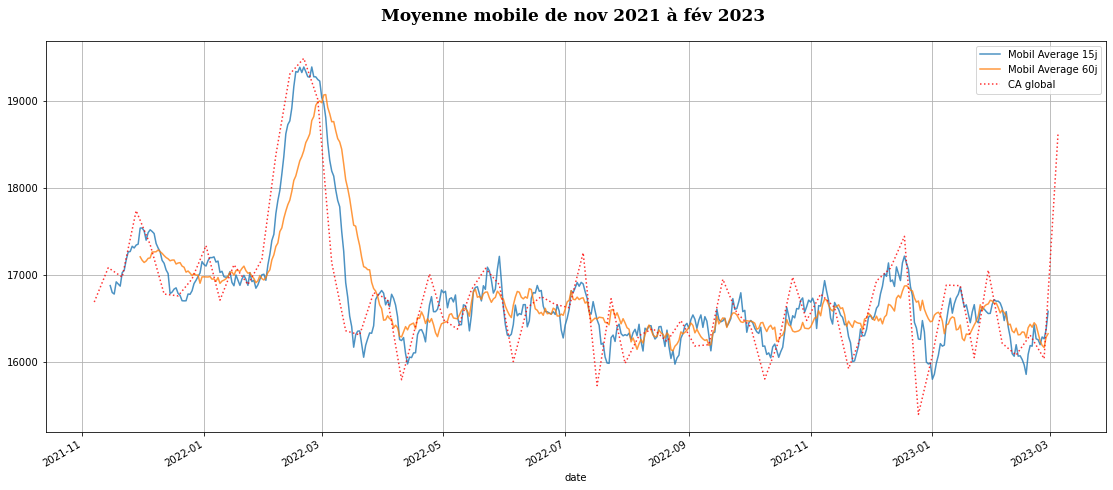

In [65]:
df_ma = dt.copy()
df_ma = df_ma.resample('D').sum()
df_ma = df_ma.loc['2021-11':'2023-02']
plt.figure(figsize = (19,8))
plt.title("Moyenne mobile de nov 2021 à fév 2023 ", pad=(20),
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 17});
df_ma['ma_15j'] = round(df_ma['price'].rolling(15).mean(),2)
df_ma['ma_60j'] = round(df_ma['price'].rolling(30).mean(),2)
plt.plot(df_ma['ma_15j'], label='Mobil Average 15j', alpha=0.8)
plt.plot(df_ma['ma_60j'], label='Mobil Average 60j', alpha=0.8)
Ca_global = df_ma['price'].resample('W').mean()
Ca_global.plot(label='CA global', color='red', ls=':', alpha=0.8, grid=False)
plt.grid("True")
plt.legend()

Les moyenne mobile sont assez fluctuantes et tendent à suivre les mm variations que le CA global. 
Plus on prend une moyenne mobile sur le moyen et long terme, plus celle ci sera lisse. 

On peut également dire que le CA s'est stabilisé depuis juin 2022 jusqu'à aujourd'hui. En effet, le magasin en ligne n'a que 2 ans, c'est tt à fait normal de subir des fluctuations importantes (haussières ou baissières) lors des premières années.
Le CA moyen oscille entre 16 et 16.5k. 

#### On remarque une baisse brusque du chiffre d'affaire de 500k€ en 09-2021 a moins de 350k€ un mois apres.

On remarque la même baisse du chiffre d'affaire pour le CA de la categ 1. 

Nous allons donc ce focalisé sur cette catégorie la et etudié son chiffre d'affaire en octobre 2021

On va chercher a savoir qu'elle est la raison de cette baisse brutale du chiffre d'affaire.

C:\Users\Salem\AppData\Local\Temp/ipykernel_8396/94881886.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  dt1_oct= dt1.loc['2021-10-01':'2021-10-31']['price'].resample('D').sum()


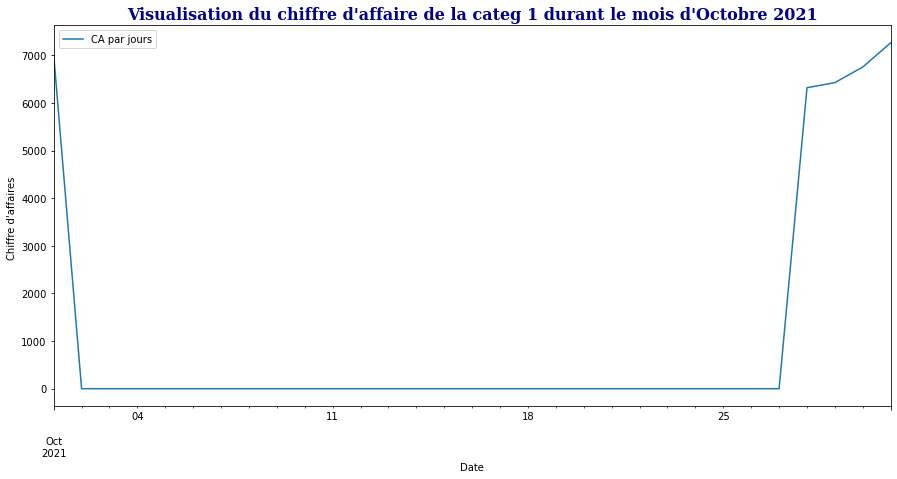

In [66]:
plt.figure(figsize=(15,7))
dt1_oct= dt1.loc['2021-10-01':'2021-10-31']['price'].resample('D').sum()
dt1_oct.plot(label='CA par jours')
plt.title("Visualisation du chiffre d'affaire de la categ 1 durant le mois d'Octobre 2021" , fontsize=16,
         fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30}) 
plt.xlabel('Date', fontsize=10) 
plt.ylabel("Chiffre d'affaires ", fontsize=10)
plt.legend()
plt.show()

    On remarque qu'entre le 2 et le 27 octobre 2021, nous avons aucune donnée concernant le CA journalier ce qui explique    dont cette chute brutal du chiffre d'affaire.
    
    Cela pourrais etre du a une perte de données.
    
    On remarque aussi que celle-ci est assez conséquente pour provoqué une chute brutal du chiffre d'affaire total durant le mois d'octobre.
    
    Pour ne pas faussé notre étude de donnée, je prend la decision de supprimé les données concernant le mois d'octobre 2021 pour toute les categ, cela revien a supprimé le mois d'octobre 2021 dans notre df_final 

In [67]:
# Isolement du mois d'octobre 2021
octobre_2021 = df.loc[(df['annee']==2021) & (df['mois']==10)]
octobre_2021

,client_id,id_prod,sex,birth,age,date,annee,mois,jours,date_fixe,session_id,price,categ,tranch_age,total_ventes,ventes_mensuelles,panier_moyen,taille moyenne du panier,CA total
68,c_5725,0_1409,m,1975,47,2021-10-02 17:39:26.919537,2021,10,2,2021-10-02,s_99013,4.99,0,41-50,239,10.00,14.20,2.15,"3,224.70"
71,c_3394,0_1247,f,1978,44,2021-10-03 16:05:12.544172,2021,10,3,2021-10-03,s_99443,15.99,0,41-50,119,5.00,15.86,3.72,"1,985.88"
80,c_8534,0_1272,m,1988,34,2021-10-13 14:35:01.163737,2021,10,13,2021-10-13,s_104207,17.01,0,31-40,247,11.00,13.50,2.33,"3,498.14"
86,c_1609,0_1102,m,1980,42,2021-10-24 13:25:39.888945,2021,10,24,2021-10-24,s_109442,4.63,0,41-50,25488,"1,108.00",12.70,34.92,"324,033.35"
93,c_7918,0_1079,m,1987,35,2021-10-05 21:57:27.673800,2021,10,5,2021-10-05,s_100557,5.99,0,31-40,101,4.00,13.06,2.81,"1,339.20"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679222,c_7213,0_1418,m,1979,43,2021-10-22 01:12:51.848429,2021,10,22,2021-10-22,s_108264,8.57,0,41-50,103,4.00,12.71,2.15,"1,265.76"
679240,c_7878,0_1391,m,1989,33,2021-10-26 04:40:29.252116,2021,10,26,2021-10-26,s_110243,7.99,0,31-40,226,10.00,14.44,2.51,"3,264.99"
679290,c_6714,0_1609,f,1968,54,2021-10-15 16:58:58.818380,2021,10,15,2021-10-15,s_105230,18.99,0,51-60,9187,399.00,16.68,13.03,"153,669.30"
679315,c_1061,0_1635,m,1991,31,2021-10-01 23:19:52.888190,2021,10,1,2021-10-01,s_98649,16.99,0,31-40,65,3.00,14.01,2.95,855.55


In [68]:
# Suppression du mois d'octobre 2021 de notre dataframe
df.drop(octobre_2021.index,inplace= True)

In [69]:
# Verification de la suppression du mois d'octobre 2021 du df
df.loc[(df['annee']==2021) & (df['mois']==10)]

,client_id,id_prod,sex,birth,age,date,annee,mois,jours,date_fixe,session_id,price,categ,tranch_age,total_ventes,ventes_mensuelles,panier_moyen,taille moyenne du panier,CA total


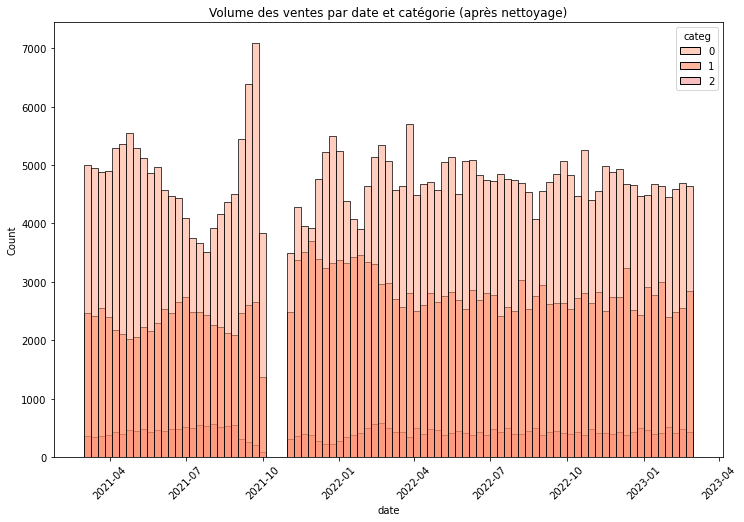

In [70]:
# Volume des ventes par date et catégorie sans le mois d'octobre
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='date', hue='categ', palette=["#ff9e80", "#ff6e40", "lightcoral"])
plt.xticks(rotation=45)
plt.title('Volume des ventes par date et catégorie (après nettoyage)')
plt.show()

In [71]:
# Chiffre d'affaire par catég aprés suppréssion du mois d'octobre 2021
CA_par_categ1 = df[['price','categ']].groupby(['categ']).sum()
print("Le chiffre d'affaire total par catégorie aprés suppréssion du mois d'octobre 2021 est de : ")
CA_par_categ1

Le chiffre d'affaire total par catégorie aprés suppréssion du mois d'octobre 2021 est de : 


,price
categ,
0,"4,222,990.36"
1,"4,619,960.37"
2,"2,692,489.43"


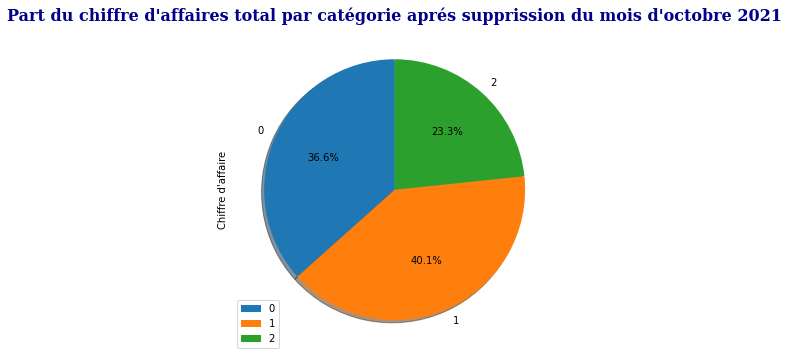

In [72]:
df[['categ','price']].groupby(['categ']).sum().rename(columns={"price" :"Chiffre d'affaire"}).plot(kind='pie', subplots=True, shadow = True,startangle=90,
                                                          figsize=(10,6),
                                                          autopct='%1.1f%%',)
plt.title("Part du chiffre d'affaires total par catégorie aprés supprission du mois d'octobre 2021" , fontsize=16,
         fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30})

plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">1.3- TOP ET FLOP :  </h3>
</div>

In [73]:
# Top 10 des produits les plus vendus
Top_vente = df[['id_prod','client_id']].groupby(['id_prod'], as_index=False).count().sort_values(by='client_id',ascending=False)
Top_vente.rename(columns={'client_id':'nbr vente par produit'},inplace=True)
Top_vente.head(10)

,id_prod,nbr vente par produit
2590,1_369,2237
2643,1_417,2173
2640,1_414,2166
2732,1_498,2117
2652,1_425,2084
2628,1_403,1950
2638,1_412,1938
2639,1_413,1931
2631,1_406,1931
2632,1_407,1923


In [74]:
# Top 10 des produits les plus vendus
Flop_vente = df[['id_prod','client_id']].groupby(['id_prod'], as_index=False).count().sort_values(by='client_id',ascending=True)
Flop_vente.rename(columns={'client_id':'nbr vente par produit'},inplace=True)
Flop_vente.head(10)

,id_prod,nbr vente par produit
2270,0_980,1
3174,2_23,1
588,0_1533,1
313,0_1284,1
2165,0_886,1
3246,2_81,1
1791,0_549,1
1783,0_541,1
664,0_1601,1
751,0_1683,1


In [75]:
# Top 10 des produits qui ont apporté le plus de CA
topCA_par_prod = df[['price','id_prod']].groupby(['id_prod']).sum('price').sort_values(by='price',ascending=False)
topCA_par_prod.rename(columns={'price':'CA/prod'},inplace=True)
topCA_par_prod.head(10)

,CA/prod
id_prod,
2_159,"92,265.68"
2_135,"67,403.23"
2_112,"62,840.10"
2_102,"58,962.58"
2_209,"55,362.09"
1_395,"53,950.39"
1_369,"53,665.63"
2_110,"51,916.50"
1_414,"51,615.78"


In [76]:
# Top 10 des produits qui ont apporté le moins de CA
flopCA_par_prod = df[['price','id_prod']].groupby(['id_prod']).sum('price').sort_values(by='price',ascending=True)
flopCA_par_prod.rename(columns={'price':'CA/prod'},inplace=True)
flopCA_par_prod.head(10)

,CA/prod
id_prod,
0_1539,0.99
0_898,1.27
0_1284,1.38
0_643,1.98
0_1653,1.98
0_807,1.99
0_541,1.99
0_1601,1.99
0_1728,2.27


In [77]:
# Classement des catégories qui ont le plus de ventes
Top_categ = df[['categ','client_id']].groupby(['categ'], as_index=False).count().sort_values(by='client_id',ascending=False)
Top_categ.rename(columns={'client_id':'nbr vente par categ'},inplace=True)
Top_categ.head()

,categ,nbr vente par categ
0,0,396911
1,1,225503
2,2,35312


In [78]:
# Classement des catégories qui ont le plus grand CA
CA_par_categ1
CA_par_categ1.rename(columns={'price':'CA/categ'},inplace=True)
CA_par_categ1.sort_values(by='CA/categ',ascending=False)

,CA/categ
categ,
1,"4,619,960.37"
0,"4,222,990.36"
2,"2,692,489.43"


In [79]:
# Top 10 des clients qui ont fait le plus d'achat
Top_client_achat = df[['id_prod','client_id']].groupby(['client_id'],
                                                     as_index=False).count().sort_values(by='id_prod',ascending=False)
Top_client_achat.rename(columns={'id_prod':'nbr achat par client'},inplace=True)

Top_client_achat.head(10)

,client_id,nbr achat par client
677,c_1609,24472
6336,c_6714,8903
2723,c_3454,6635
4387,c_4958,5090
2513,c_3263,392
1772,c_2595,384
1268,c_2140,381
1197,c_2077,370
7119,c_7421,368
7790,c_8026,368


In [80]:
# Top 10 des clients qui ont fait le moins d'achat
Flop_client_achat = df[['id_prod','client_id']].groupby(['client_id'],
                                                     as_index=False).count().sort_values(by='id_prod',ascending=True)
Flop_client_achat.rename(columns={'id_prod':'nbr achat par client'},inplace=True)

Flop_client_achat.head(10)

,client_id,nbr achat par client
6516,c_6879,1
5867,c_6292,1
1556,c_240,1
3809,c_4436,1
694,c_1624,1
5500,c_5962,1
4043,c_4648,1
3575,c_4223,1
3854,c_4478,1
1991,c_2793,1


In [81]:
# Top 10 des clients qui ont les plus gros CA
CA_par_client 

,client_id,CA total
0,c_1609,"324,033.35"
1,c_4958,"289,760.34"
2,c_6714,"153,669.30"
3,c_3454,"113,673.12"
4,c_3263,"5,276.87"
...,...,...
8595,c_4648,11.20
8596,c_240,11.06
8597,c_8114,9.98
8598,c_8140,8.30


In [82]:
# Top 10 des clients qui ont les plus petit CA
FlopCA_par_client = df[['price','client_id']].groupby(['client_id'],as_index=False).sum('price').sort_values(by='price',ascending=True)
FlopCA_par_client.rename(columns={'price':'CA/client'},inplace=True)
FlopCA_par_client.head(10)

,client_id,CA/client
7917,c_8140,8.30
7888,c_8114,9.98
1556,c_240,11.06
4043,c_4648,11.20
1991,c_2793,12.99
3854,c_4478,13.36
5500,c_5962,13.99
5588,c_6040,15.72
5452,c_5919,15.98
5353,c_5829,16.07


On remarque ici 4 clients qui ont un CA total largement supérieure au autres client, et aussi >100k.

Géneralement ce type de client ne sont pas des particuliers, on peut emettre l'hypothése que ces clients sont des professionnels. Nous allons verifier en comparant par exemple leur frequence d'achat etc...

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">1.4- Inégalité des CA entre clients :  </h3>
</div>

In [83]:
# Top 10 des clients ayant le plus gros CA 
CA_client = df.pivot_table(index='client_id', values=['CA total','ventes_mensuelles','total_ventes','panier_moyen']).sort_values(
                                                                             by='CA total', ascending=False).reset_index()
CA_client.head(10)

,client_id,CA total,panier_moyen,total_ventes,ventes_mensuelles
0,c_1609,"324,033.35",12.70,25488,"1,108.00"
1,c_4958,"289,760.34",56.00,5195,226.00
2,c_6714,"153,669.30",16.68,9187,399.00
3,c_3454,"113,673.12",16.49,6773,294.00
4,c_3263,"5,276.87",13.23,403,18.00
5,c_1570,"5,271.62",14.80,369,16.00
6,c_2899,"5,214.05",55.75,105,5.00
7,c_2140,"5,208.82",12.60,402,17.00
8,c_7319,"5,155.77",13.43,371,16.00
9,c_8026,"5,094.31",13.69,377,16.00


Grâce a ces données, nous pouvons validé notre hypothése par le faite qu'on distingue bien que les 4 premiers clients sont des professionnel car un particulier ne fait pas 288 achats de livre par mois, a moins qu'il lise les livres à la vitesse de la lumière.

Nous allons donc maintenant séparer les professionnels des particuliers pour eviter d'impacté nos différentes analyse futur

In [84]:
# Creation d'une variable Type de clients.
df['client_type'] = 'Parti'
client_pro = df['client_id'].isin(CA_par_client.head(4)['client_id'])
df['client_type'].loc[df[client_pro].index] = 'Pro'
Pro = df.loc[df['client_type']=='Pro']
Parti = df.loc[df['client_type']=='Parti']

C:\Users\Salem\Python\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [85]:
Pro['client_id'].unique()

array(['c_6714', 'c_4958', 'c_1609', 'c_3454'], dtype=object)

In [86]:
CA_pro = Pro['price'].sum() / df['price'].sum() * 100
print("Le chiffre d'affaire des clients professionnel représente " , round(CA_pro,2), " % du chiffre d'affaire entre",  str(df['date'].min())[:10], 'et', str(df['date'].max())[:10])

Le chiffre d'affaire des clients professionnel représente  7.43  % du chiffre d'affaire entre 2021-03-01 et 2023-02-28


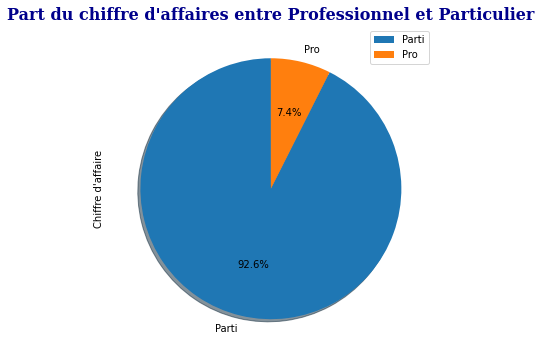

In [87]:
df[['client_type','price']].groupby(['client_type']).sum().rename(columns={"price" :"Chiffre d'affaire"}).plot(kind='pie', subplots=True, shadow = True,startangle=90,
                                                          figsize=(10,6),
                                                          autopct='%1.1f%%',)
plt.title("Part du chiffre d'affaires entre Professionnel et Particulier" , fontsize=16,
         fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30})

plt.show()

Nous allons maintenant faire une représentation graphique de l'inégalité des chiffre d'affaire entre client a l'aide de la courbe de Lorenz.

Et ensuite on calcul l'indice de gini qui nous permettra de mesuré l'inégalité des chiffre d'affaires de tout les clients

L'indice de Gini est un chiffre compris entre 0 et 1 qui mesure l'aire compris entre la bisséctrice et la courbe de Lorenz

Si cette indice est égal a 0 alors l'egalité est parfaite alors que, plus celui ci ce rapproche de 1 plus on observera la présence d'inégalité entre les clients

In [88]:
# Courbe de Lorenz
def lorenz(variable, title):
    X = variable.values
    X = np.sort(X)
    
    # Courbe de Lorenz
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    # X_lorenz[0], X_lorenz[-1]
    y = np.arange(X_lorenz.size)/(X_lorenz.size-1)
    lorenz = pd.DataFrame()
    lorenz['X'] = pd.Series(X_lorenz)
    lorenz['Y'] = pd.Series(y)
    sns.scatterplot(data=lorenz, x='Y', y='X', marker='x')

    # Diagonale
    a = np.arange(0,1,.01)
    x = a
    y = a
    
    # Graphique
    sns.lineplot(x=x,y=y)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.plot([0,1], [0,1], color='orange', label='Bissectrice') #tracer la bisséctrice
    plt.vlines(0.5, 0, 0.5, ls='dotted', color='black')
    plt.hlines(0.5, 0, 0.5, ls='dotted', color='black', label='Médiale')
    plt.title(title)
    plt.show()

    # Indice de Gini
    def gini(array):
        array
        sorted_array = array.copy()
        sorted_array.sort()
        n = array.size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_array)])
        return coef_*weighted_sum/(sorted_array.sum()) - const_
    print('Indice de Gini :', gini(X))

In [89]:
def Lorenz_gini(df):
    new = df[["client_id","price"]].copy()
    new = new.groupby(['client_id']).sum()
    new.sort_values("client_id", axis = 0, inplace = True)
    print()
    print("Courbe Lorenz : ")
    price = new['price']
    n = len(price)
    lorenz = np.cumsum(np.sort(price)) / price.sum()
    lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
    plt.plot(np.linspace(0, 1, len(lorenz)), lorenz, label='CA par client')
    plt.plot([0,1], [0,1], color='orange', label='Bissectrice') #tracer la bisséctrice
    plt.vlines(0.5, 0, 0.5, ls='dotted', color='black')
    plt.hlines(0.5, 0, 0.5, ls='dotted', color='black', label='Médiale')
    plt.title("Répartition du CA entre client ",fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 18})
    plt.legend()
    
    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
    S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
    gini = round(2*S,2)
    print("Gini : ", gini)

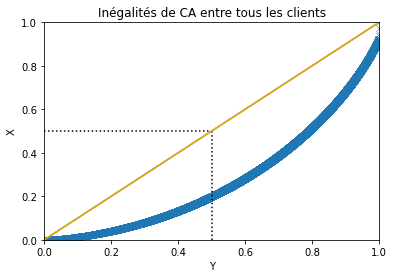

Indice de Gini : 0.44627114462542683


In [90]:
# Inégalité des chiffres d'affaires annuels de tous les clients
lorenz(CA_client['CA total'], 'Inégalités de CA entre tous les clients')

L'indice de Gini se rapproche de 50 %, on peut donc ce dire que 50 % des clients ont un chiffre d'affaire égalitaire et l'autre moitié des clients ont un CA inégalitaire

In [91]:
CA_client_Parti = Parti.pivot_table(index='client_id')['CA total']
CA_client_Parti

client_id
c_1        558.18
c_10     1,353.60
c_100      254.85
c_1000   2,261.89
c_1001   1,812.86
           ...   
c_995      189.41
c_996    1,625.58
c_997    1,490.01
c_998    2,779.88
c_999      701.40
Name: CA total, Length: 8594, dtype: float64

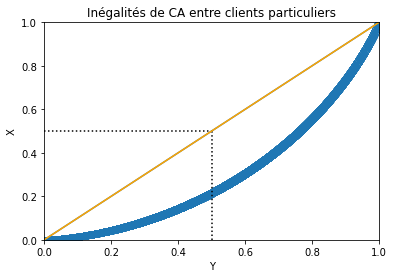

Indice de Gini : 0.40249694257918534


In [92]:
# Inégalité des chiffres d'affaires annuels des clients particuliers
lorenz(CA_client_Parti , 'Inégalités de CA entre clients particuliers')

On remarque une legère baisse de l'indice de gini suite a l'exclusion des 4 professionnel.

Nous allons maintenant analysé séparement les differents clients en fonction de leurs âges, leurs sexe, nombre d'achats par catégorie etc..

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">1.4.1 - Clients Pro :  </h3>
</div>

In [93]:
# Visualisation des clients pro 
Pro.pivot_table(index='client_id').reset_index()

,client_id,CA total,age,annee,birth,categ,jours,mois,panier_moyen,price,taille moyenne du panier,total_ventes,ventes_mensuelles
0,c_1609,"324,033.35",42,"2,021.68",1980,0.22,15.88,6.46,12.70,12.78,34.92,25488,"1,108.00"
1,c_3454,"113,673.12",53,"2,021.71",1969,0.61,15.53,6.40,16.49,16.85,9.28,6773,294.00
2,c_4958,"289,760.34",23,"2,021.70",1999,1.63,15.56,6.33,56.00,55.53,7.17,5195,226.00
3,c_6714,"153,669.30",54,"2,021.70",1968,0.46,15.36,6.39,16.68,16.83,13.03,9187,399.00


On remarque que le client c_4958 a le plus grand panier moyen que les autres professionnel alors que sa fréquence d'achat est la moins élevé

Nous allons verifié comment cela est possible en représentant la distribution des prix par rapport au client

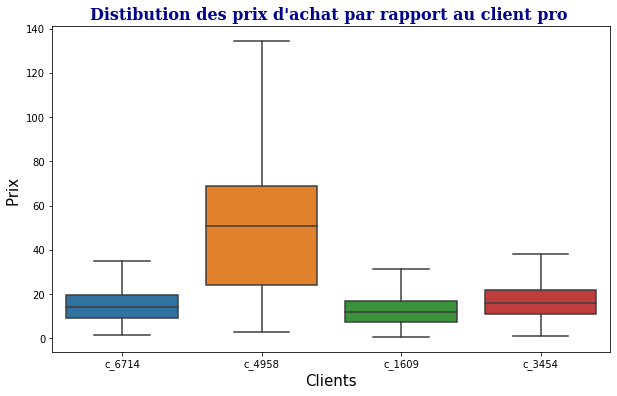

In [94]:
plt.figure(figsize=(10,6)),
sns.boxplot(data = Pro, x='client_id', y='price', showfliers=False)
plt.title("Distibution des prix d'achat par rapport au client pro " , fontsize=16,
         fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30}) ,
plt.xlabel('Clients', fontsize=15), 
plt.ylabel("Prix ", fontsize=15),
plt.show()

On remarque que la distribution des prix d'achat du client c_4958 est considerablement plus élevé que celle des autres clients ce qui montre pourquoi même avec une fréquence d'achat moins élevé que les autres son panier moyen est plus grand.

On peut dire que le client c_4958 achète des livres beaucoup plus chers

In [95]:
nb_achat_pro_categ = Pro[['client_id','categ','price']].groupby(['client_id','categ'],as_index=False).count()
nb_achat_pro_categ.rename(columns={'price':'nbr achat'},inplace=True)
nb_achat_pro_categ

,client_id,categ,nbr achat
0,c_1609,0,19184
1,c_1609,1,5277
2,c_1609,2,11
3,c_3454,0,2584
4,c_3454,1,4035
5,c_3454,2,16
6,c_4958,0,1
7,c_4958,1,1877
8,c_4958,2,3212
9,c_6714,0,5073


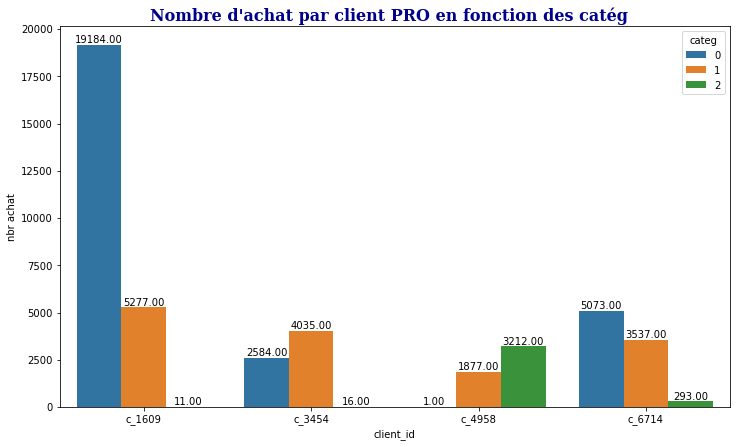

In [96]:
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(ax = ax, data = nb_achat_pro_categ, x = 'client_id', y = 'nbr achat', hue = 'categ')
ax.bar_label(ax.containers[0],fmt='%1.2f')
ax.bar_label(ax.containers[1],fmt='%1.2f')
ax.bar_label(ax.containers[2],fmt='%1.2f')
plt.title("Nombre d'achat par client PRO en fonction des catég  ", fontsize=16,
         fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30}) ,
plt.show()

Ici on peut voir que tout les clients sauf c_4958 consomme trés peu voir pas du tout les produits de la catég 2.

Vu que c_4958 a le plus grand panier moyen on peut ce dire que la catégorie influe sur le prix du livre.

Nous allons le verifié en analysant la distribution des prix en fonction de la catégorie

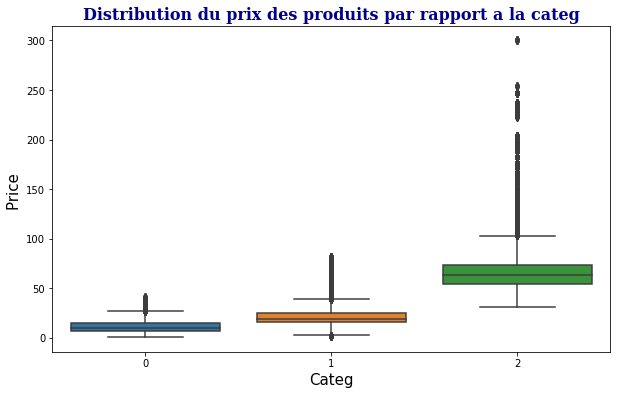

In [97]:
plt.figure(figsize=(10,6)),
sns.boxplot(x = df["categ"], y = df["price"]),
plt.title('Distribution du prix des produits par rapport a la categ' , fontsize=16,
         fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30}), 
plt.xlabel('Categ', fontsize=15) ,
plt.ylabel("Price ", fontsize=15),
plt.show()

En effet, ici on voit que les prix de la catégorie 2 sont largement plus élevé que ceux de la catégorie 0 et 1, ils sont 2x voir 3x fois plus élevé ce qui conforte notre précédente remarque

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">1.4.2 - Clients Particuliers :  </h3>
</div>

### Par sexe

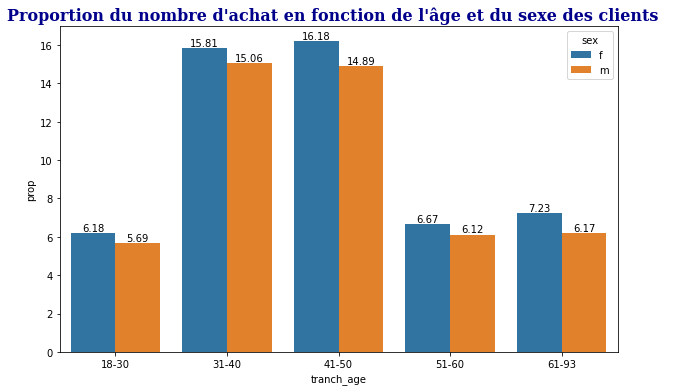

In [98]:
o = Parti.groupby(['tranch_age','sex']).size() / Parti.groupby(['tranch_age','sex']).size().sum()*100
o = o.reset_index()
o.rename(columns={0:'prop'},inplace=True)
o
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(ax = ax, data = o, x = 'tranch_age', y = 'prop', hue = 'sex')
ax.bar_label(ax.containers[0],fmt='%1.2f')
ax.bar_label(ax.containers[1],fmt='%1.2f')
plt.title("Proportion du nombre d'achat en fonction de l'âge et du sexe des clients  ", fontsize=16,
         fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30}) ,
plt.show()

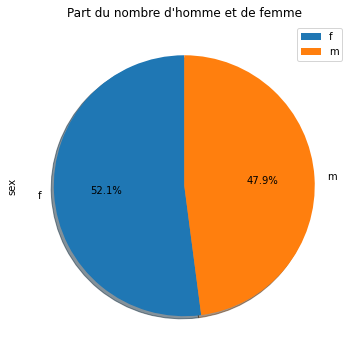

In [99]:
plt.figure(figsize=(10,6))
Parti['sex'].value_counts().plot(kind='pie', subplots=True, shadow = True,startangle=90,
                                                          figsize=(10,6),
                                                          autopct='%1.1f%%',)
plt.title('Part du nombre d\'homme et de femme')
plt.legend()
plt.show()

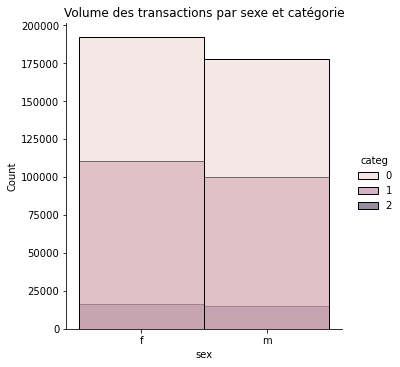

In [100]:
sns.displot( data = Parti, x='sex', hue='categ')
plt.title('Volume des transactions par sexe et catégorie')
plt.show()

A l'aide de tout ces graphique on remarque que tout les données comme la répartion des prix par sexe, le volume de transactions sexe et catégorie ou la proportion du nombre d'achats en fonction du sexe montre une représentation presque identique.

Nous pouvons emettre l'hypothèse qu'il n'y a pas de lien direct entre le genre d'un client et la catégorie de livre achetés.

### Par âge

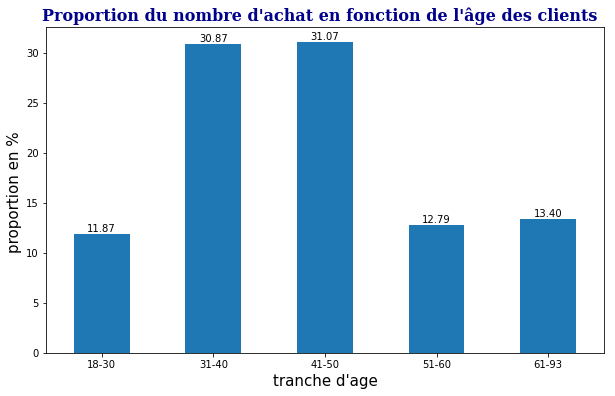

In [101]:
proportion_achat_age_client = (Parti.groupby('tranch_age').size() / Parti.groupby('tranch_age').size().sum())*100        
plt.figure(figsize=(10,6))
ax = proportion_achat_age_client.plot(kind='bar')
ax.bar_label(ax.containers[0],fmt='%1.2f')
plt.xticks(rotation=0)
plt.xlabel("tranche d'age", fontsize=15), 
plt.ylabel("proportion en % ", fontsize=15),
plt.title("Proportion du nombre d'achat en fonction de l'âge des clients  ", fontsize=16,
         fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30}) ,       
plt.show()

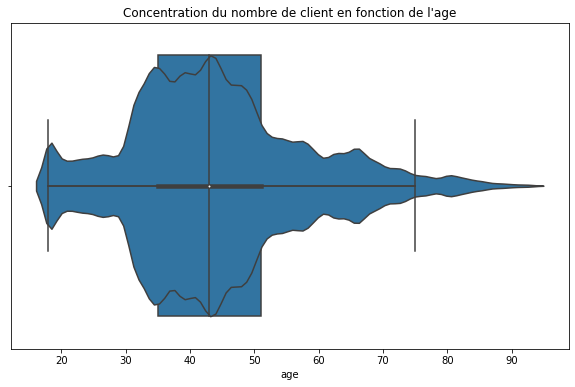

In [102]:
plt.figure(figsize=(10,6))
sns.boxplot(data = Parti, x='age', showfliers=False)
sns.violinplot(data = Parti, x='age', showfliers=False)
plt.title('Concentration du nombre de client en fonction de l\'age')
plt.show()

A l'aide de ces deux graphique généré on remarque que les 30-50 ans représente plus de la moitié des clients.

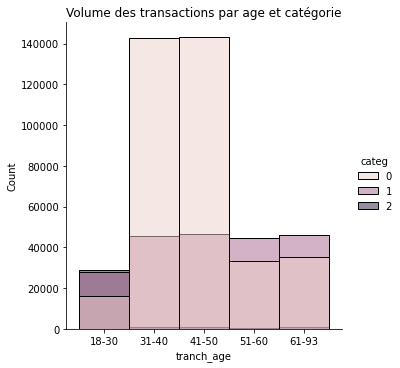

In [103]:
sns.displot( data = Parti, x='tranch_age', hue='categ', fill=True)
plt.title('Volume des transactions par age et catégorie')
plt.show()

Ici on remarque que toutes les catégories sont consommé par tout les âges mais que la catégorie 2 est presque uniquement consommé par les moins de 30 ans et que la catégorie 0 est consommé principalement par les 31-50 ans 

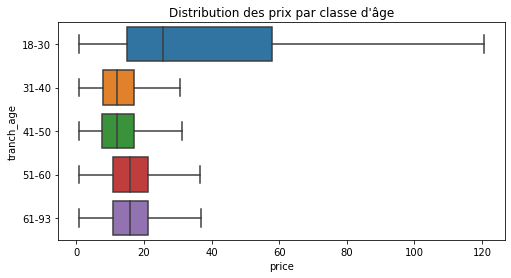

In [104]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df.sort_values(by='tranch_age'), y='tranch_age', x='price', showfliers=False)
plt.title('Distribution des prix par classe d\'âge')
plt.show()

On voit que les prix d'achat des 18-30 ans est largement plus élevé que les autres classes d'âges, on remarque aussi que les prix des achats des 31-50 est bas par rapport au autres 

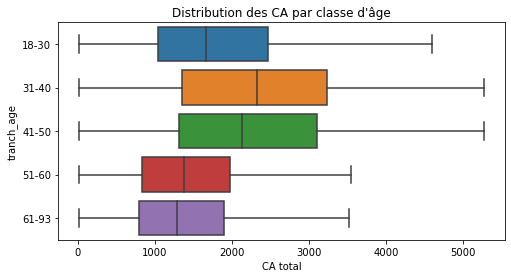

In [105]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=Parti.sort_values(by='tranch_age'), 
            y='tranch_age', x='CA total',showfliers=False)
plt.title('Distribution des CA par classe d\'âge')
plt.show()

On remarque donc une corrélation entre le chiffre d'affaire et l'âge des clients car,
   
       On a pu voir que la catégorie 0 est celle qui est le plus consommé par les 31-50 ans, de plus cette tranche d'age la concentre plus de 50 % des volumes d'achats au cours de la periode données. 

       C'est pourquoi les 31-50 ans on le plus gros chiffres d'affaires suivis des moins de 30 ans qui eux consomme presque uniquement des produit de la catégorie 2 qui sont les livres les plus chers que l'on vend

### Par la fréquence d'achat

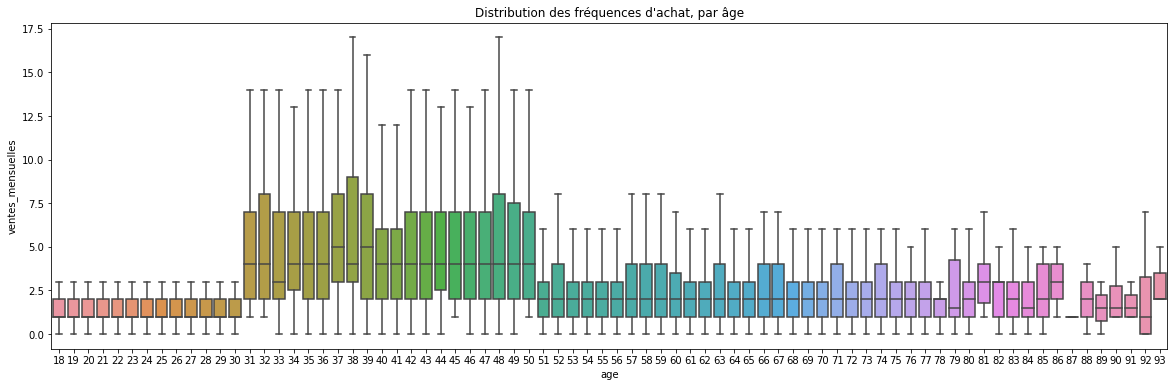

In [106]:
plt.figure(figsize=(20,6))
sns.boxplot( data= Parti.pivot_table(index=['client_id']), x='age',  y='ventes_mensuelles', showfliers=False)
plt.xticks(rotation=0)
plt.title('Distribution des fréquences d\'achat, par âge')
plt.show()

Pareil que pour le chiffre d'affaire on distingue plusieurs groupes d'individus : 
     
        - Les - 30 ans qui achete au maximum 3 livres par mois
        - Les 31-50 ans qui eux sont le groupe qui achete le plus de livres par mois ( au moins 12 livres par mois )
        - Les 51-93, leurs nombres d'achat par mois varies beaucoup mais ne depasse pas les 8 livres par mois

### Par la taille du panier

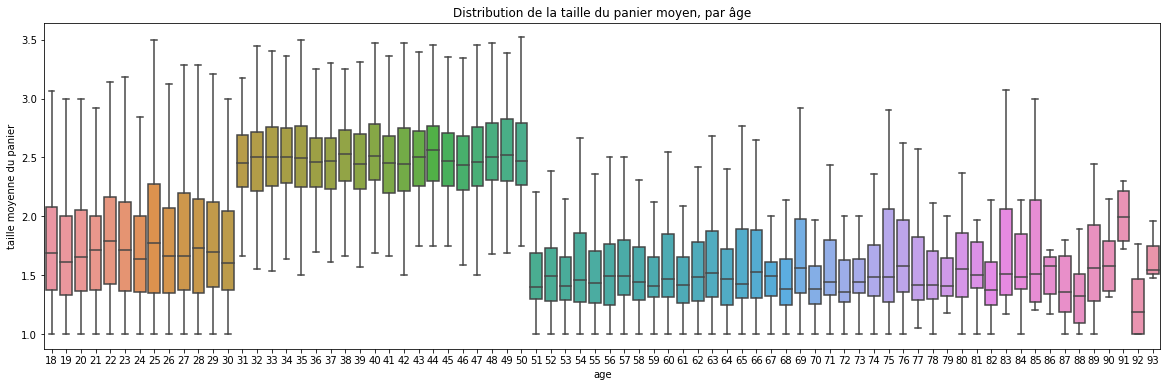

In [107]:
plt.figure(figsize=(20,6))
sns.boxplot( data= Parti.pivot_table(index=['client_id']), x='age',  y='taille moyenne du panier', showfliers=False)
plt.xticks(rotation=0)
plt.title('Distribution de la taille du panier moyen, par âge')
plt.show()

Pareil que pour la frequence d'achat on distingue la meme logique : 
     
        - Les - 30 ans achete en moyenne 3 livres par paniers
        - Les 31-50 ans qui eux sont le groupe qui achete le plus de livres dans le même panier achète
        - Les 51-93, leurs nombres d'achat par mois varies beaucoup mais ne depasse pas les 8 livres par mois.

 <div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">2 - Analyse pour Julie </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">  Corrélation :  </h3>
</div>

**Méthodologie** :

- Quelles sont le type de mes variables ? 
- Je choisie un test
- Quelles sont les conditions pour que ce test soit applicable ? 
- Visuel 
- Optionnel : Si je n'ai pas les conditions réunies, quelles sont mes alternatives ? (non para ?)
- Test et résultat

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); "> 2.1 - Sexe et catégorie CHI- 2 </h3>
</div>

Type et categ sont deux variables qualitatives : **Test de Khi-2** indique si les fréquences d’observation d’une catégorie dépendent des modalités de l’autre catégorie (corrélation) 

**Conditions test de khi-2**

Comporte 2 variables qualitatives : va comparer les fréquences de ces deux groupes afin d'inférer une relation entre X et Y. 
Le khi-2 est un test para, assume que les échantillons suivent une loi normale.

**Alternative** : test exact de fisher (non para)

In [108]:
crosstab = pd.crosstab(Parti['categ'], Parti['sex'], margins=False)
crosstab

sex,f,m
categ,,
0,192025,178044
1,110550,100227
2,16429,15351


In [109]:
# fréquence en %
contigency_pct = pd.crosstab(Parti['categ'], Parti['sex'], normalize='index')
contigency_pct

sex,f,m
categ,,
0,0.52,0.48
1,0.52,0.48
2,0.52,0.48


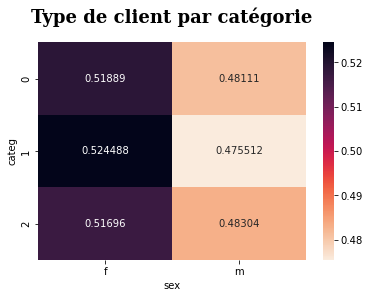

In [110]:
# Visuel heatmap
sns.heatmap(contigency_pct, cmap='rocket_r', annot=True, fmt='g');
plt.title("Type de client par catégorie", pad=(20),fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 18});


### **Test de normalité** :

**H0** : nos échantillons ne suivent pas une loi normale

**H1** : nos échantillons suivent une loi normale


Test de Shapiro :  'statistic' = basé sur la corrélation, + il est proche de 1, mieux il montre que les données correspondent à la distribution normale et 'pvalue'.

In [111]:
# Test de Shapiro-Wilk : car échantillon de petite taille
from scipy.stats import shapiro
alpha=0.05 
resultat = shapiro(crosstab)
print("statistic", round(resultat[0],3))
print("p-value", resultat[1])
if resultat[1] > alpha:
    print('H0 rejetée')
else:
    print("H0 non rejetée")

statistic 0.888
p-value 0.3062482476234436
H0 rejetée


pvalue > alpha = **H0 rejetée = nos échantillons suivent une loi normale**

On va voir avec le khi-2 s'il semble vraiment y avoir un lien :  

### Hypothèses :

**H0** = Categ et le genre d'un client sont indépendants (pas de lien)


**H1** = Le genre d'un client va influencer l'achat d'une des catégories de pdt (lien)

stat de test khi2 :  18.758
p-value 8.44846e-05
degré de liberté 2
H0 rejetée


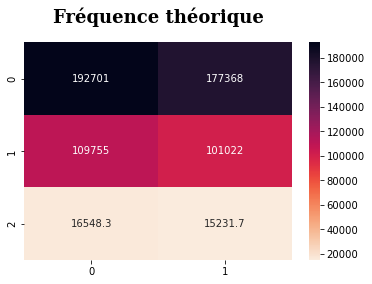

In [112]:
# Chi-square test of independence
from scipy.stats import chi2_contingency
alpha = 0.05 

chi2, p, dl, contingent_theorique = chi2_contingency(crosstab) 
# chie2=coef de corrélation, dof=degré de liberté, pvalue

#Dans les statistiques, les degrés de liberté sont utilisés pour définir le nombre de grandeurs indépendantes pouvant être affectées à une distribution statistique
#

print("stat de test khi2 : ", round(chi2,3))
print("p-value", round(p,10))
print("degré de liberté", round(dl,3))
#print("Valeurs théoriques :", contingent_theorique)
if p > alpha:
    print('H0')
else:
    print("H0 rejetée")
    
sns.heatmap(contingent_theorique, cmap='rocket_r', annot=True, fmt='g');
plt.title('Fréquence théorique', pad=(20),fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 18});

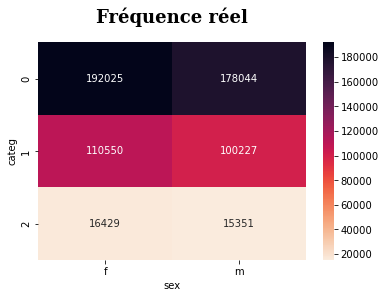

In [113]:
# Visuel heatmap
sns.heatmap(crosstab, cmap='rocket_r', annot=True, fmt='g');
plt.title("Fréquence réel", pad=(20),fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 18});

Pvalue < alpha = **H0 rejeté : Il semble qu'il y ai un lien significatif** entre le genre d'un client et les catégories.

Les fréquences théoriques sont relativement proche des fréquences obtenues dans le tableau de contingence.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); "> 2.2 - Montant (CA) et age (PEARSON) </h3>
</div>

Le coefficient de corrélation linéaire, ou de Bravais-Pearson, permet de mesurer à la fois la force et le sens d’une association. Variant de -1 à +1, il vaut 0 lorsqu’il n’existe pas d’association. Plus ce coefficient est proche de -1 ou +1, plus l’association entre les deux variables est forte, jusqu’à être parfaite.

In [114]:
prix_par_age = Parti.groupby('age').sum()['price'].reset_index()
prix_par_age.rename(columns={"price":'somme des prix par age'},inplace=True)
prix_par_age

,age,somme des prix par age
0,18,"591,414.23"
1,19,"172,831.75"
2,20,"178,802.38"
3,21,"174,347.66"
4,22,"160,578.67"
...,...,...
71,89,"5,090.71"
72,90,"4,803.64"
73,91,"2,691.19"
74,92,"3,959.24"


In [115]:
import statsmodels.api as sm
x= prix_par_age[['age']]
y= prix_par_age[['somme des prix par age']]
Y = y
X = x
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']

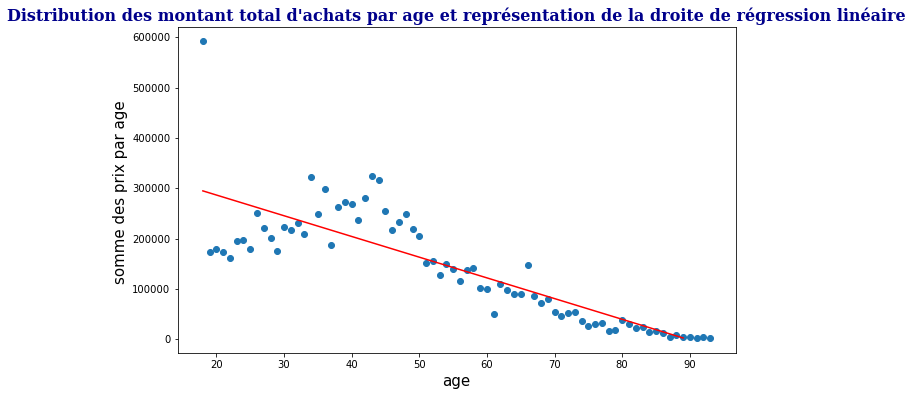

In [116]:
plt.figure(figsize=(10,6))
plt.plot(x,y,'o')
plt.plot(np.arange(18,90),[a*x+b for x in np.arange(18,90)],'r')
plt.title('Distribution des montant total d\'achats par age et représentation de la droite de régression linéaire',fontsize=16,
         fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30})
plt.xlabel("age", fontsize=15), 
plt.ylabel("somme des prix par age ", fontsize=15),
plt.show()

In [117]:
#Coefficient de corrélation linéaire de Pearson
coef_age_price = stats.pearsonr(prix_par_age['age'], prix_par_age['somme des prix par age'])[0]
coef_age_price

-0.8310031673901326

      On peut voir que le coefficient est plus proche de -1 que de zéro. 

    Par conséquent, on peut affirmer que plus les consommateurs sont agés plus le montant total de leur achat est faible.

    Il y a donc une forte corrélation entre l'âge et le montant total des achats. 
    
    On distingue trois groupes d'âge differents a l'aide du graphique ci dessus ( 18-30 ,31-50 ,51+ ), on peut essayé de vérifié cette corrélation en utilisant l'age en tranche d'age qui diviendra une variable qualitative et ensuite utilisé l'Anova pour voir si la corrélation est vérifié ou non .

In [118]:
bin_labels=labels=['18-30','31-50','51-93']
prix_par_age['tranch_age'] = pd.cut(x=prix_par_age['age'], bins=[17,30,50,93],labels=bin_labels)
prix_par_age.rename(columns={'somme des prix par age':'sum_price_age'},inplace=True)

Hypothèses :

**H0** : Il n'y a pas de lien entre les tranche d'âge des clients et les montants dépensés

**H1** : Les tranche d'âge des clients semblent avoir une influance sur les montants dépensés

In [119]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# Test d'ANOVA
model = smf.ols('sum_price_age ~ tranch_age', data=prix_par_age).fit()
anova_table = sm.stats.anova_lm(model)
p = anova_table['PR(>F)'][0]
print('Test ANOVA\np-value :', p)
if p > 0.05:
    print(*"H0:   Il n'y a pas de lien entre les tranche d'âge des clients et les montants total des achats.")
else:
    print("H0 rejeté:  Les tranche d'âge des clients semblent avoir une influance sur les montants total des achats.")
anova_table

Test ANOVA
p-value : 1.9230031385044963e-18
H0 rejeté:  Les tranche d'âge des clients semblent avoir une influance sur les montants total des achats.


,df,sum_sq,mean_sq,F,PR(>F)
tranch_age,2.00,"602,917,186,696.20","301,458,593,348.10",75.10,0.00
Residual,73.00,"293,029,913,637.93","4,014,108,406.00",NaN,NaN


 <div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); "> 2.3 - Age et fréquence d'achat ( PEARSON anova )   </h3>
</div>

In [120]:
freq_vente_par_age = Parti.groupby('age').sum()['ventes_mensuelles'].reset_index()
freq_vente_par_age.rename(columns={"ventes_mensuelles":'ventes_mensuelles par age'},inplace=True)
freq_vente_par_age

,age,ventes_mensuelles par age
0,18,"30,323.00"
1,19,"7,994.00"
2,20,"8,584.00"
3,21,"8,518.00"
4,22,"9,154.00"
...,...,...
71,89,952.00
72,90,911.00
73,91,352.00
74,92,"1,229.00"


In [121]:
x1= freq_vente_par_age[['age']]
y1= freq_vente_par_age[['ventes_mensuelles par age']]
Y1 = y
X1 = x
X1 = X.copy() # On modifiera X, on en crée donc une copie
X1['intercept'] = 1.
result1 = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a1,b1 = result.params['age'],result.params['intercept']

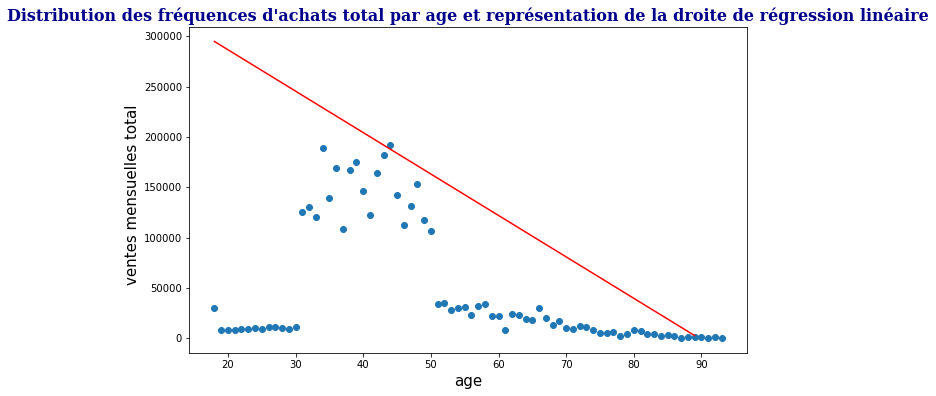

In [122]:
plt.figure(figsize=(10,6))
plt.plot(x1,y1,'o')
plt.plot(np.arange(18,90),[a*x+b for x in np.arange(18,90)],'r')
plt.title('Distribution des fréquences d\'achats total par age et représentation de la droite de régression linéaire',fontsize=16,
         fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30})
plt.xlabel("age", fontsize=15), 
plt.ylabel("ventes mensuelles total  ", fontsize=15),
plt.show()

In [123]:
#Coefficient de corrélation linéaire de Pearson
coef_age_price = stats.pearsonr(freq_vente_par_age['age'], freq_vente_par_age['ventes_mensuelles par age'])[0]
coef_age_price

-0.44268436477441264

La corrélation entre l'âge des clients et leurs fréquences d'achat n'est pas confirmée a l'aide du coefficient de pearson car il est plus proche de 0 que de -1.

On remarque aussi la présence de trois groupes distinct de clients les 18-30 ans,30-50 ans et les +51 ans.

Nous allons donc testé la corrélation entre la fréquence d'achat(quantitative) et les tranches d'âges (qualitative) a l'aide de l'anova

In [124]:
bin_labels=labels=['18-30','31-50','51-93']
freq_vente_par_age['tranch_age'] = pd.cut(x=freq_vente_par_age['age'], bins=[17,30,50,93],labels=bin_labels)
freq_vente_par_age.rename(columns={"ventes_mensuelles par age":'frequence_par_tranche_age'},inplace=True)
freq_vente_par_age

,age,frequence_par_tranche_age,tranch_age
0,18,"30,323.00",18-30
1,19,"7,994.00",18-30
2,20,"8,584.00",18-30
3,21,"8,518.00",18-30
4,22,"9,154.00",18-30
...,...,...,...
71,89,952.00,51-93
72,90,911.00,51-93
73,91,352.00,51-93
74,92,"1,229.00",51-93


Hypothèses :

**H0** : Il n'y a pas de lien entre les tranches d'âge des clients et les fréquences d'achats

**H1** : Les tranches d'âge des clients semblent avoir une influance sur les fréquences d'achats

In [125]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# Test d'ANOVA
model = smf.ols('frequence_par_tranche_age ~ tranch_age', data=freq_vente_par_age).fit()
anova_table = sm.stats.anova_lm(model)
p = anova_table['PR(>F)'][0]
print('Test ANOVA\np-value :', p)
if p > 0.05:
    print("H0:  Il n'y a pas de lien entre les tranches d'âge des clients et les fréquences d'achats.")
else:
    print("H0 rejeté: Les tranches d'âge des clients semblent avoir une influance sur les fréquences d'achats.")
anova_table

Test ANOVA
p-value : 3.939881979383015e-42
H0 rejeté: Les tranches d'âge des clients semblent avoir une influance sur les fréquences d'achats.


,df,sum_sq,mean_sq,F,PR(>F)
tranch_age,2.00,"255,605,260,020.93","127,802,630,010.47",460.85,0.00
Residual,73.00,"20,244,260,165.86","277,318,632.41",NaN,NaN


 <div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); "> 2.4 - Age et taille panier moyen ( PEARSON ANOVA ) </h3>
</div>

In [126]:
taille_panier_par_age = Parti.groupby('age').sum()['taille moyenne du panier'].reset_index()
taille_panier_par_age.rename(columns={"taille moyenne du panier":'taille panier mean par age'},inplace=True)
taille_panier_par_age

,age,taille panier mean par age
0,18,"28,899.31"
1,19,"7,933.58"
2,20,"8,830.26"
3,21,"8,095.18"
4,22,"8,800.38"
...,...,...
71,89,478.97
72,90,467.01
73,91,310.93
74,92,363.70


In [127]:
x2= taille_panier_par_age[['age']]
y2= taille_panier_par_age[['taille panier mean par age']]
Y2 = y
X2 = x
X2 = X.copy() # On modifiera X, on en crée donc une copie
X2['intercept'] = 1.
result2 = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a2,b2 = result.params['age'],result.params['intercept']

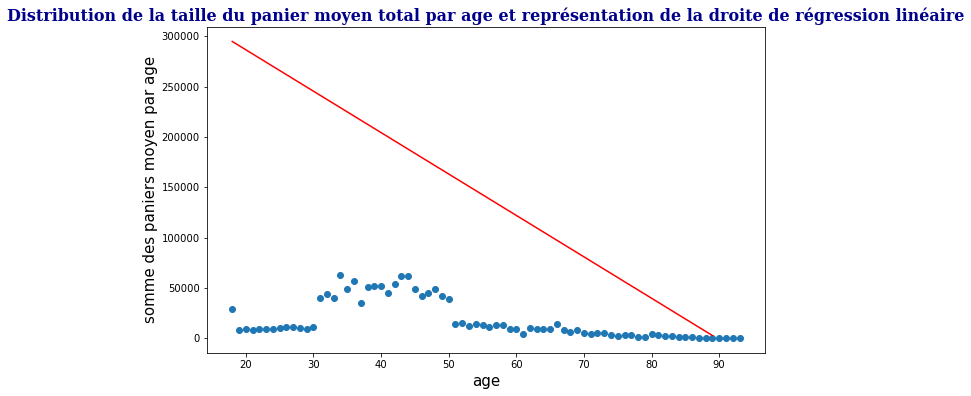

In [128]:
plt.figure(figsize=(10,6))
plt.plot(x2,y2,'o')
plt.plot(np.arange(18,90),[a*x+b for x in np.arange(18,90)],'r')
plt.title('Distribution de la taille du panier moyen total par age et représentation de la droite de régression linéaire',fontsize=16,
         fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30})
plt.xlabel("age", fontsize=15), 
plt.ylabel("somme des paniers moyen par age", fontsize=15),
plt.show()

In [129]:
#Coefficient de corrélation linéaire de Pearson
coef_age_price = stats.pearsonr(taille_panier_par_age['age'], taille_panier_par_age['taille panier mean par age'])[0]
coef_age_price

-0.5404703882322941

La corrélation entre l'âge des clients et la taille du panier moyenne est confirmée a l'aide du coefficient de pearson car il est plus proche de -1 que de 0.

On remarque aussi encore une fois la présence de trois groupes distinct de clients les 18-30 ans,30-50 ans et les +51 ans.
Nous allons essayé de confirmé ce resultat en faisant de même que les deux précédente corrélations.

In [130]:
bin_labels=labels=["18-30","31-50","51-93"]
taille_panier_par_age['tranch_age'] = pd.cut(x=taille_panier_par_age['age'], bins=[17,30,50,93],labels=bin_labels)
taille_panier_par_age.rename(columns={"taille panier mean par age":'size_mean_panier'},inplace=True)
taille_panier_par_age

,age,size_mean_panier,tranch_age
0,18,"28,899.31",18-30
1,19,"7,933.58",18-30
2,20,"8,830.26",18-30
3,21,"8,095.18",18-30
4,22,"8,800.38",18-30
...,...,...,...
71,89,478.97,51-93
72,90,467.01,51-93
73,91,310.93,51-93
74,92,363.70,51-93


Hypothèses :

**H0** : Il n'y a pas de lien entre les tranches d'âge des clients et le panier moyen

**H1** : Les tranches d'âge des clients semblent avoir une influance sur les panier moyen

In [131]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# Test d'ANOVA
model = smf.ols('size_mean_panier ~ tranch_age', data=taille_panier_par_age).fit()
anova_table = sm.stats.anova_lm(model)
p = anova_table['PR(>F)'][0]
print('Test ANOVA\np-value :', p)
if p > 0.05:
    print("H0 : Il n'y a pas de lien entre les tranches d'âge des clients et le panier moyen.")
else:
    print("H0 rejeté: Les tranches d'âge des clients semblent avoir une influance sur le panier moyen.")
anova_table

Test ANOVA
p-value : 8.67817462448351e-39
H0 rejeté: Les tranches d'âge des clients semblent avoir une influance sur le panier moyen.


,df,sum_sq,mean_sq,F,PR(>F)
tranch_age,2.00,"25,575,377,928.84","12,787,688,964.42",366.29,0.00
Residual,73.00,"2,548,550,218.90","34,911,646.83",NaN,NaN


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); "> 2.5 - Catégorie et âge ANOVA   </h3>
</div>

Le test dit de la variance va nous permettre de verifier la corrélation entre une variable quantitative (âge) et une variable qualitative (catégorie) et de repondre a notre question : Il y a t-il un lien entre l'âge d'un client et la catégorie de livre acheté ?

On va tester l’indépendance entre la variable qualitative catégorie et la variable quantitative Âge.

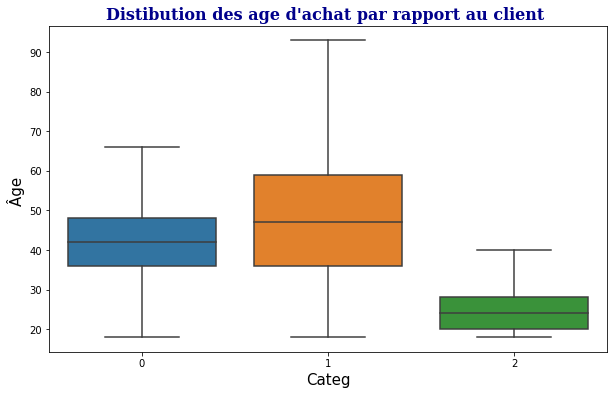

In [132]:
plt.figure(figsize=(10,6)),
sns.boxplot(data = Parti, x='categ', y='age', showfliers=False)
plt.title("Distibution des age d'achat par rapport au client " , fontsize=16,
         fontdict={'family':'serif','color' : 'darkblue','weight' : 'bold', 'size' : 30}) ,
plt.xlabel('Categ', fontsize=15), 
plt.ylabel("Âge ", fontsize=15),
plt.show()

In [133]:
Parti.groupby('categ').mean()['age'].reset_index()

,categ,age
0,0,43.80
1,1,47.80
2,2,25.96


Dans une ANOVA, on cherche à déterminer si les moyennes des groupes sont significativement différentes. On pose donc :

 - H0 : Les variables sont indépendantes 
 - H1 : Les variables ne sont pas indépendantes 

In [134]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# Test d'ANOVA
model = smf.ols('age ~ categ', data=Parti).fit()
anova_table = sm.stats.anova_lm(model)
p = anova_table['PR(>F)'][0]
print('Test ANOVA\np-value :', p)
if p > 0.05:
    print('H0:  Les variables sont indépendantes.')
else:
    print('H0 rejeté: Les variables ne sont pas indépendantes.')
anova_table

Test ANOVA
p-value : 0.0
H0 rejeté: Les variables ne sont pas indépendantes.


,df,sum_sq,mean_sq,F,PR(>F)
categ,1.00,"797,390.69","797,390.69","4,163.13",0.00
Residual,"612,624.00","117,339,837.14",191.54,NaN,NaN



L’indépendance est aussi une des 3 conditions de validité d’une ANOVA. Seul le contexte de l’étude permet de s’assurer de l’indépendance entre les échantillons de chaque groupe (ici categ 1, categ 2 , categ 3 .)

Les deux autres conditions sont : 
 - Test de normalité
 - Homogéinité des variances

**Test de normalité** : Smirnov-Kolmogorov

**H0** : échantillon suit une loi normale

**H1** : échantillon ne suit pas une loi normale

In [135]:
# Test de KS :
alpha = 0.05
resultat = stats.kstest(Parti.categ, Parti.age, 'norm')
print("stat de test", resultat[0])
print("p-value", resultat[1])
if resultat[1] > alpha:
    print('H0')
else:
    print("H0 rejetée")

stat de test 1.0
p-value 0.0
H0 rejetée


Nos échantillons ne suivent pas une loi normale. On va regarder l'égalité des variances : 

**Test d'égalité des variances** :  homogénéité de la variance = homoscédasticité

**H0** : La variance des groupes sont égales 

**H1** : La variance des groupes sont différentes

In [136]:
a = Parti[Parti['categ']==0]['age']
b = Parti[Parti['categ']==1]['age']
c = Parti[Parti['categ']==2]['age']
stat, p = stats.levene(a, b, c)
print('Condition 2 : homoscédasticité (Levene)',
    '\nstats :', stat,
    '\np-value :', p)
if p > 0.05:
    print('H0: les variances sont égales')
else:
    print('H0 rejeté: les variances ne sont pas égales ')

Condition 2 : homoscédasticité (Levene) 
stats : 23352.540268035827 
p-value : 0.0
H0 rejeté: les variances ne sont pas égales 


Pvalue > alpha, on rejete H0 donc les variances des groupes sembles être ==

**Les conditions de l'ANOVA ne sont donc pas remplies : on va faire le test alternatif Kruskal-Wallis**

**Test alternatif Kruskal-Wallis**
Hypothèses :

**H0** : L'age et les catégories ne sont pas correlés

**H1** : L'age et les catégories sont correlés

In [137]:
from scipy import stats
# Récupérer la p-value# Test de Kruskal-Wallis
alpha = 0.05

resultat = stats.kruskal(Parti['categ'], Parti['age'])
print("stat de test", round(resultat[0],3))
print("p-value", resultat[1])
if resultat[1] > alpha:
    print("H0:  L'age et les catégories ne sont pas correlés.")
else:
    print("H0 rejetée:  L'age et les catégories sont correlés.")

stat de test 950050.097
p-value 0.0
H0 rejetée:  L'age et les catégories sont correlés.
